# DS 7331 Data Mining

### Lab 3
* Tahir Ahmad<br>
* Christopher Ballenger<br>
* Grant Bourzikas<br>
* Vitaly Briker<br>

### Grading Rubric<a id=Top></a>
* **[Business Understanding](#Business_Understanding)**
    * **[10 points]** Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?   
* **[Data Understanding 1](#Data_Understanding_1)**
    * **[10 points]** Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
* **[Data Understanding 2](#Data_Understanding_2)**
    * **[10 points]** Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
* **[Modeling and Evaluation 1](#ME_1)**
    * **[10 points]** Train and adjust parameters. K-modes. (Highly Unlikely to Highly Likely). Gower Distance.
* **[Modeling and Evaluation 2](#ME_2)**
    * **[10 points]** Evaluate and Compare using Silhoutte score
* **[Modeling and Evaluation 3](#ME_3)**
    * **[10 points]** Visualize Results. Visualize important features
* **[Modeling and Evaluation 4](#ME_4)**
    * **[20 points]** Summarize the Ramification    
* **[Deployment](#Deployment)**
    *  **[10 points]** Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    * **[10 points]** You have free reign to provide additional analyses or combine analyses. PCA, Gower Distance. Compare K-Modes, Gower Distance, Hierarchical Clustering.

### Business Understanding <a id="Business_Understanding"></a>

If we look back at the last 15-20 years, Cybersecurity has become a very important topic across every person in the world regardless of their age and every business.  This point is illustrated by two growth factor- Market Capital and Jobs. The capital market has more than doubled in spend in the US since 2010 and it will triple from 2019 until 2022 reaching to a total market capital of 180 billion.  Additionally, because of the growth, there is a need for cybersecurity professionals.  The job market is exraordinary hot because the number of jobs has doubled since 2010 and there will be a total of 6 million jobs in 2019 with a 2 million gap in open positions, or what the industry calls the talent shortage. This appears to reflect a healthy growth market and the cybersecurity industry is booming.

| Spend in Cybersecurity | Demand for Security Professionals | Breaches Over Years
| --- | --- | --- |
| 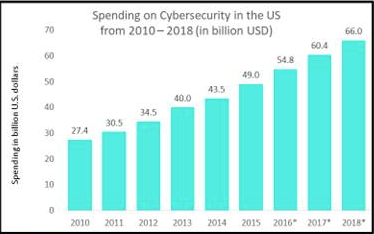 | 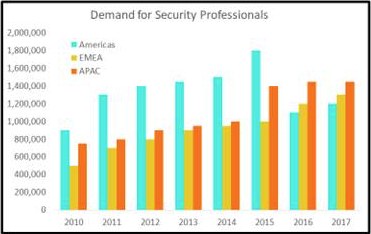 | 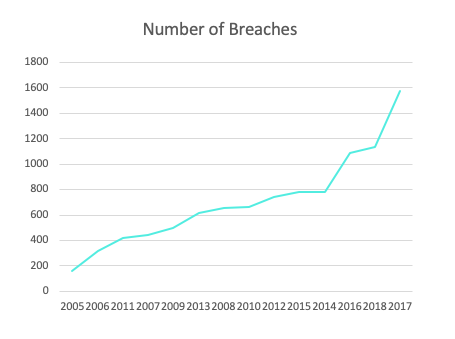 |
| Source: Statista 2019|Source: Frost and Sullivan | Source: Identity Threat Resource Center |  

However, the reality of cybersecurity is that since 2005, the world has seen a growth in the number of annual breaches in companies by 9x. We have seen OPM, JP Morgan, Anthem, Sony, Equifax, Home Depot, Adult Friend Finder, Yahoo!, Target and recently Marriott was just breached resulting in a compromise of 500 million records. While the world has spent hundreds of Billions of dollars and hired over 6 million cybersecurity professionals, the attackers are winning and have been winning as long as the Internet has been around. The cybersecurity attackers are very organized, well-funded, and in some cases, nation state backed. Unlike many industries, attackers or criminals are making millions of dollars attacking companies, like CryptoWall, which made a reported amount of 325 million dollars. 

One answer to address the attacker problem is to integrate Data Science into cybersecurity in order to predict the outcomes of attackers utilizing rich data sets.  This is a new capability that cybersecurity is starting to use and could hold the key for the future.  Many industry pundits believe that data science, machine learning, deep learning, and Artificial intelligence will be the keys to successfully to stop attackers.  Over the last few years, companies like McAfee, Symantec, Cylance, and Crowd Strike have developed Machine Learning Behavioral Products, but these are still not 100% effective because the attackers are writing malware that can bypass these algorithms or feature sets.   In order to secure the future, the cybersecurity industry must evolve and develop more advanced algorithms to prevent and stop attackers. 

In order to help solve this problem, Team 4 is going to predict the probability of whether a Windows machines could get infected by various families of malware.  This dataset that will be used is part of a current __[Microsoft Kaggle competition](https://www.kaggle.com/c/microsoft-malware-prediction/data)__ and was captured by Microsoft in order to help them predict if Kagglers could determine whether machines would be breached.  Within the dataset, telemetry containing various properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

For this lab, Team 4 will predict if a machine is vulnerable to a malware attack. The dataset has more than 300,000 rows and 83 columns. Using several clustering methods (K-modes, PCA, and Gower Distance), the team will identify different clusters that have variant degrees of probability being infected. The probability score can be calculated by comparing the clustering results to "HasDetections" feature of the dataset. The team will identify the optimum clustering numbers by using silhoutte score. For each clustering methods the team will train and adjust the parameters, evaluate and compare, visualize the results, and lastly summarize the ramifications of the methods chosen.

**Chris to comment on the clustering: infinite number of scenarios and clustering to help this.**

**Need to answer this requirement: Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?** (ask Dr. Drew) 

We choose K-mode and Gower due to 100% categorical features in our data. Grant to explain PCA model (PCA for feature reduction then clustering?)

# Data Understanding 1<a id="Data_Understanding_1"></a>


### [Data Preparation Part 1a (Pre Processing)](#Pre_Processing)
1. Set appropiate data types
2. Removed columns that may be problematic
    * Columns with same value in all rows
    * Columsn with a unique value in all rows
    * Empty Columns
3. Remove columns with low fill rate or high frequency of same value
4. Missing values
    * Update Census Continous values
    * Update Census Categorical values
    * Update remaining values
5. Remove Duplicate Rows
6. Data Quality Clean-up
7. Create new features

### [Data Preparation Part 1b (Feature Selection Modeling Building)](#Feature_Selection_Modeling_Building)
1. Create One-Hot encoding on variables used for modeling
2. Remove columns with similar characteristics or a correlation more than .95

### [Data Preparation Part 2 (Final Dataset)](#Data_Definitions)

In [1]:
import pandas as pd
import numpy as np

%run -i ColumnArrays.py

%time malware = pd.read_csv("data/final.csv")
%time data_glossary = pd.read_csv("data/data_glossary.csv", index_col=0)

<string>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 5.02 s, sys: 461 ms, total: 5.48 s
Wall time: 4.91 s
CPU times: user 2.67 ms, sys: 551 µs, total: 3.22 ms
Wall time: 10.4 ms


In [2]:
def load_column_array(cols):
    cols_booleans = [
        "IsBeta",
        "IsSxsPassiveMode",
        "HasTpm",
        "IsProtected",
        "AutoSampleOptIn",
        "PuaMode",
        "SMode",
        "Firewall",
        "UacLuaenable",
        "Census_HasOpticalDiskDrive",
        "Census_IsPortableOperatingSystem",
        "Census_IsFlightingInternal",
        "Census_IsFlightsDisabled",
        "Census_ThresholdOptIn",
        "Census_IsSecureBootEnabled",
        "Census_IsWIMBootEnabled",
        "Census_IsVirtualDevice",
        "Census_IsTouchEnabled",
        "Census_IsPenCapable",
        "Census_IsAlwaysOnAlwaysConnectedCapable",
        "Wdft_IsGamer"
    ]

    cols_categorical = [
        "ProductName",
        "EngineVersion",
        "AppVersion",
        "AvSigVersion_x_x",
        "RtpStateBitfield",
        "AVProductsInstalled",
        "AVProductsEnabled",
        "CountryIdentifier",
        "OrganizationIdentifier",
        "Platform",
        "Processor",
        "OsVer",
        "OsBuild",
        "OsSuite",
        "OsPlatformSubRelease",
        "SkuEdition",
        "SmartScreen",
        "Census_MDC2FormFactor",
        "Census_DeviceFamily",
        "Census_ProcessorManufacturerIdentifier",
        "Census_ProcessorClass",
        "Census_PrimaryDiskTypeName",
        "Census_ChassisTypeName",
        "Census_PowerPlatformRoleName",
        "Census_InternalBatteryType",
        "Census_OSArchitecture",
        "Census_OSBranch",
        "Census_OSBuildNumber",
        "Census_OSEdition",
        "Census_OSSkuName",
        "Census_OSInstallTypeName",
        "Census_OSInstallLanguageIdentifier",
        "Census_OSUILocaleIdentifier",
        "Census_OSWUAutoUpdateOptionsName",
        "Census_GenuineStateName",
        "Census_ActivationChannel",
        "Census_FlightRing",
        "Wdft_RegionIdentifier"
    ]

    cols_categorical_large = [
 #       "AvSigVersion",
        "DefaultBrowsersIdentifier",
        "AVProductStatesIdentifier",
        "CityIdentifier",
        "GeoNameIdentifier",
        "OsBuildLab",
        "IeVerIdentifier",
        "Census_OEMNameIdentifier",
        "Census_OEMModelIdentifier",
        "Census_ProcessorModelIdentifier",
        "Census_OSVersion",
        "Census_OSBuildRevision",
        "Census_FirmwareManufacturerIdentifier",
        "Census_FirmwareVersionIdentifier",
        "LocaleEnglishNameIdentifier"
    ]

    cols_numerical = [
        "Census_ProcessorCoreCount",
        "Census_PrimaryDiskTotalCapacity",
        "Census_SystemVolumeTotalCapacity",
        "Census_TotalPhysicalRAM",
        "Census_InternalPrimaryDiagonalDisplaySizeInInches",
        "Census_InternalPrimaryDisplayResolutionHorizontal",
        "Census_InternalPrimaryDisplayResolutionVertical",
        "Census_InternalBatteryNumberOfCharges"
    ]
    
    # Update our column arrays
    cols_categorical = [x for x in cols_categorical if x in cols]
    cols_numerical = [x for x in cols_numerical if x in cols]
    cols_booleans = [x for x in cols_booleans if x in cols]
    cols_categorical_large = [x for x in cols_categorical_large if x in cols]
    
    return cols_categorical, cols_numerical, cols_booleans, cols_categorical_large

[Go back to Data Preperation](#Data_Preperation)
## Data Preparation Part 1 (Pre-Processing)<a id="Pre_Processing"></a>
### 1. Mapping appropriate data types
In order to understand the quality of the data, we did an extensive review of the data and determined which fields should be considered categorical, continous, or boolean.  We converted 23 id and category fields to object as well as removed outliers to make values boolean.  

In order to help provide easier development, we created 4 array of column names: cols_booleans, cols_numerical, cols_categorical, and cols_categorical_large. The values with over 100 possible values were moved to its own bucket, cols_categorical_large, requiring special care to review in order to determine if we could cluster values together.

The remaining code are steps we took to clean our data.

In [3]:
cols_categorical, cols_numerical, cols_booleans, cols_categorical_large = load_column_array(malware.columns)

print( "cols_booleans" ) 
display( cols_booleans )
print( "cols_numerical" )
display( cols_numerical )
print( "cols_categorical" )
display( cols_categorical )
print( "cols_categorical_large" )
display( cols_categorical_large )

#Convert features to right data type
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

cols_booleans


['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

cols_numerical


['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges']

cols_categorical


['ProductName',
 'EngineVersion',
 'AppVersion',
 'RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Wdft_RegionIdentifier']

cols_categorical_large


['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSVersion',
 'Census_OSBuildRevision',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'LocaleEnglishNameIdentifier']

### 2. Remove problematic columns
* Columns with same value in all rows
* Columns with a unique value in all rows
* Empty Columns

In [4]:
#Reference: https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicElementarySchools2017_ML.ipynb

UniqueValueCounts = malware.nunique(dropna=False)
SingleValueCols = UniqueValueCounts[UniqueValueCounts == 1].index
malware = malware.drop(SingleValueCols, axis=1)

#Review dataset contents after drops
print( "Removing the following columns\n", SingleValueCols )
print( "\r\nAfter: Removing columns with the same value in every row" )
malware.info(verbose=False)
print('\r\nColumns Deleted: ', len(SingleValueCols) )

#Remove any fields that have unique values in every row
malwareRecordCt = malware.shape[0]
UniqueValueCounts = malware.apply(pd.Series.nunique)
AllUniqueValueCols = UniqueValueCounts[UniqueValueCounts == malwareRecordCt].index
malware = malware.drop(AllUniqueValueCols, axis=1)

#Review dataset contents after drops
print( "Removing the following columns\n", AllUniqueValueCols )
print( "\r\nAfter: Removing columns with unique values in every row" )
malware.info(verbose=False)
print( "\r\nColumns Deleted: ", len(AllUniqueValueCols) )

#Remove any empty fields (null values in every row)
malwareRecordCt = malware.shape[0]
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts == malwareRecordCt].index
malware = malware.drop(NullValueCols, axis=1)

#Review dataset contents after empty field drops
print( "Removing the following columns\n", NullValueCols )
print( "\r\nAfter: Removing columns with null / blank values in every row." )
malware.info(verbose=False)
print( "\r\nColumns Deleted: ", len(NullValueCols) )

Removing the following columns
 Index(['IsBeta', 'CountryIdentifier'], dtype='object')

After: Removing columns with the same value in every row
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 81 entries, MachineIdentifier to HasDetections
dtypes: float64(19), int64(9), object(53)
memory usage: 206.0+ MB

Columns Deleted:  2
Removing the following columns
 Index(['MachineIdentifier'], dtype='object')

After: Removing columns with unique values in every row
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 80 entries, ProductName to HasDetections
dtypes: float64(19), int64(9), object(52)
memory usage: 203.5+ MB

Columns Deleted:  1
Removing the following columns
 Index([], dtype='object')

After: Removing columns with null / blank values in every row.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 80 entries, ProductName to HasDetections
dtypes: float64(19), int64(9), obje

### 3. Columns with low fill-rate or high frequency of same value

* Remove columns with 60% of values are NA or NULL
* Remove columsn with 80% of high frequency of same value

In [5]:
#Eliminate columns with 80% of missing values
malwareRecordCt = malware.shape[0]
missingValueLimit = malwareRecordCt * .6
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts >= missingValueLimit].index
malware = malware.drop(NullValueCols, axis=1)

#Review dataset contents after empty field drops
print( "Removing the following columns\n", NullValueCols )
print( "\r\nAfter: Removing columns with >= .6 % of missing values" )
malware.info(verbose=False)
print ("\r\nColumns Deleted: ", len(NullValueCols) )

#Eliminate values with 80% of the value is the same
malwareRecordCt = malware.shape[0]
sameValueLimit = malwareRecordCt * .8
MaxColumnFreq = malware.apply(lambda x: x.value_counts().values[0])
HighFreqCols = MaxColumnFreq[MaxColumnFreq >= sameValueLimit].index
malware = malware.drop(HighFreqCols, axis=1)

#Review dataset contents after high frequency delete
print( "Removing the following columns\n", HighFreqCols )
print( "\r\nAfter: Removing columns with >= .8 % of missing values" )
malware.info(verbose=False)
print ("\r\nColumns Deleted: ", len(HighFreqCols) )


Removing the following columns
 Index(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass',
       'Census_InternalBatteryType', 'Census_IsFlightingInternal',
       'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled'],
      dtype='object')

After: Removing columns with >= .6 % of missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Columns: 73 entries, ProductName to HasDetections
dtypes: float64(16), int64(9), object(48)
memory usage: 185.7+ MB

Columns Deleted:  7
Removing the following columns
 Index(['ProductName', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductsEnabled', 'HasTpm', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable',
       'Census_DeviceFamily', 'Census_HasOpticalDiskDrive',
       'Census_OSArchitecture', 'Census_IsPortableOperatingSystem',
       'Census_GenuineStateName', 'Census_IsF

In [6]:
# Update our column arrays
cols_categorical = [x for x in cols_categorical if x in malware.columns]
cols_numerical = [x for x in cols_numerical if x in malware.columns]
cols_booleans = [x for x in cols_booleans if x in malware.columns]
cols_categorical_large = [x for x in cols_categorical_large if x in malware.columns]

### 4. Impute Missing Values
#### Census Hardware Configurations
The continuous values represent all of hardware configurations on a machine, for example memory and hard drive capacity.  In order to assign the right value, we will use the median value grouped by **Census_MDC2FormFactor**.

In [7]:
#get the median value for each field
rowsBefore = malware[cols_numerical].isnull().T.any().T.sum()

#Removing values less then 0
malware[cols_numerical] = malware[cols_numerical].replace(-1, np.nan)

malware[cols_numerical] = malware.groupby("Census_MDC2FormFactor")[cols_numerical]\
    .transform(lambda x: x.fillna(x.median()))

#Review dataset contents after Census_MDC2FormFactor Census hardware Imputation
print("After: Updating Missing Continous Values")   
rowsAfter = malware[cols_numerical].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing Census Hardware by Census_MDC2FormFactor') 
malware['Census_MDC2FormFactor'][malware[cols_numerical].isnull().T.any().T].value_counts()

After: Updating Missing Continous Values
Rows Updated / Imputed:  14431

Total Rows Missing Census Hardware by Census_MDC2FormFactor


Series([], Name: Census_MDC2FormFactor, dtype: int64)

#### Census Categorial Configurations
Assign remaining missing values associated to Census details based on the mode of **Census_MDC2FormFactor**

In [8]:
#Get all census fields
CensusFields = malware.filter(regex='Census').columns
NullValueCounts = malware[CensusFields].isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts > 0 ].index

rowsBefore = malware[NullValueCols].isnull().T.any().T.sum()

#Group by FormFactor and OSSkuName
malware[NullValueCols] = malware.groupby(["Census_MDC2FormFactor"])[NullValueCols]\
    .transform(lambda x: x.fillna(x.mode()[0]))

#Review dataset contents after Census Mode Imputations
print("After: Updating Missing Continous Values")   
rowsAfter = malware[NullValueCols].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing for Census Fields: ',malware[CensusFields].isnull().T.any().T.sum() )

After: Updating Missing Continous Values
Rows Updated / Imputed:  9458

Total Rows Missing for Census Fields:  0


#### Remaining Features
Set the remaining features as 0, to indicate not turned on (boolean) or feature available (categorical).

In [9]:
NullValueCounts = malware.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts > 0 ].index

rowsBefore = malware[NullValueCols].isnull().T.any().T.sum()

malware[NullValueCols] = malware[NullValueCols].fillna(0)

#Review dataset contents after Census Mode Imputations
print("After: Updating Missing Values")   
rowsAfter = malware[NullValueCols].isnull().T.any().T.sum()
rowsUpdated = rowsBefore - rowsAfter
print('Rows Updated / Imputed: ', rowsUpdated )
print('\r\nTotal Rows Missing values: ',malware.isnull().T.any().T.sum() )

After: Updating Missing Values
Rows Updated / Imputed:  120472

Total Rows Missing values:  0


### 5. Data Quality

In [10]:
# Smart Screen fill miising values and fix characters issue
malware.SmartScreen.replace({"off":"Off","00000000":"ExistsNotSet","&#x02;" :"ExistsNotSet",
                                 "&#x01;" :"ExistsNotSet",0:"ExistsNotSet"},inplace=True)
# currently renamed "Census_PrimaryDiskTypeName" unknown data into one category
malware.Census_PrimaryDiskTypeName.replace({"Unspecified":"Other"},inplace=True)

# currently renamed "Census_ChassisTypeName" unknown data into one category
malware.Census_ChassisTypeName.replace({"UNKNOWN":"Other","Unknown":"Other","0" :"Other",
                                "30" :"Other",
                                "35" :"Other",
                                "112" :"Other",
                                "76" :"Other",
                                "39" :"Other"},inplace=True)

# currently renamed "Census_PowerPlatformRoleName" unknown data into one category

malware.Census_PowerPlatformRoleName.fillna('Other', inplace=True)

malware.Census_PowerPlatformRoleName.replace({"UNKNOWN":"Other"},inplace=True)

### 6. Drop Duplicates

In [11]:
rowsBefore = len(malware)
malware = malware.drop_duplicates()


#Review dataset after deleting duplicates
print("After: Deleting rows")   
rowsAfter = len(malware)
rowsUpdated = rowsBefore - rowsAfter
print('Rows removed: ', rowsUpdated )

After: Deleting rows
Rows removed:  499


### 7. New Features
**AvSigVersion** is a version number with its format of *1.217.1014.0*.  To reduce our columnes for One-Hot Encoding, we reduced the version to just Major.Minor.  or *1.217*.

In [12]:
AvSigUniqueValueCounts = malware["AvSigVersion"].nunique()

AvSigVersion_split = malware["AvSigVersion"].str.rsplit(pat=".",expand=True)
malware["AvSigVersion_x_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]

AvSigXXUniqueValueCounts = malware["AvSigVersion_x_x"].nunique()

print( "The unique values for AvSigVersion is ", AvSigUniqueValueCounts)
print( "After the transformation of Major.Minor, the unique features reudced to ", AvSigXXUniqueValueCounts)

# Add AvSigVersion_x_x to cols_categorical
cols_categorical.append("AvSigVersion_x_x")

# Add to data glossary
data_glossary = data_glossary.append(
    pd.DataFrame(
        data = ["New Feature: Reduced version of Defender state information e.g. 1.217"],
        index = ["AvSigVersion_x_x"],
        columns = ["description"]
    )
)

The unique values for AvSigVersion is  5704
After the transformation of Major.Minor, the unique features reudced to  36


In [13]:
# Save our dataset as malware.clean.csv
malware.to_csv("data/malware.clean.csv", index=False)

[Go Back to Data Preperation](#Data_Preperation)
## Data Preparation Part 1b (Feature Selection Modeling Building)<a id="Feature_Selection_Modeling_Building"></a>
Following functions are used during model building
* Create One-Hot Encoding
* Remove Highly Corrleated Features

In [14]:
def get_one_hot_encodings(df, cols):
    result = pd.DataFrame()
    i = 0
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col)
        if( i == 0 ):
            result = dummies.copy()
        else:
            result = pd.concat((result, dummies), axis=1)
        i+=1
    return result

In [15]:
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

### Example of feature reductions on highly correlated values
1. Examine the columns
    * We will create dummy variables for all columns that have less then 100 unique values, which are classified in the cols_categorical array.
2. Remove highly correlated values

During our modeling building we will include the larger categorical variables as needed in order to improve our model.

In [16]:
pd.options.display.max_rows = 999

malware = pd.read_csv("data/malware.clean.csv")
malware[cols_categorical] = malware[cols_categorical].astype(object)
malware[cols_categorical_large] = malware[cols_categorical_large].astype(object)

oneHotUniqueValueCounts = malware[cols_categorical].apply(lambda x: x.nunique())
print( "Cateogiries that have less then 100 unique values" )
display(oneHotUniqueValueCounts)

oneHotUniqueValueCounts = malware[cols_categorical_large].apply(lambda x: x.nunique())
print( "Cateogiries that have more then 100 unique values" )
display(oneHotUniqueValueCounts)
pd.reset_option('max_row')

Cateogiries that have less then 100 unique values


EngineVersion                             49
AppVersion                                77
AVProductsInstalled                        6
OrganizationIdentifier                    20
OsBuild                                   34
OsSuite                                    9
OsPlatformSubRelease                       9
SkuEdition                                 8
SmartScreen                                6
Census_MDC2FormFactor                     11
Census_ProcessorManufacturerIdentifier     4
Census_PrimaryDiskTypeName                 4
Census_ChassisTypeName                    23
Census_PowerPlatformRoleName               8
Census_OSBranch                           13
Census_OSBuildNumber                      42
Census_OSEdition                          23
Census_OSSkuName                          22
Census_OSInstallTypeName                   9
Census_OSInstallLanguageIdentifier        25
Census_OSUILocaleIdentifier               27
Census_OSWUAutoUpdateOptionsName           6
Census_Act

Cateogiries that have more then 100 unique values


AVProductStatesIdentifier                 2961
CityIdentifier                            2798
OsBuildLab                                 395
IeVerIdentifier                            150
Census_OEMNameIdentifier                   402
Census_OEMModelIdentifier                11512
Census_ProcessorModelIdentifier           1767
Census_OSVersion                           263
Census_OSBuildRevision                     220
Census_FirmwareManufacturerIdentifier      101
Census_FirmwareVersionIdentifier          9343
dtype: int64

### Feature Reduction for Large Categories
#### For the remaining large categories, we are evaluating the counts and dropping off the one that exceed the limit. The objective is to reduce the number of large categories while maintaining the integrity of the data

In [17]:
def redLargeCat (malware, attribute, limit):
    SumCat = pd.crosstab(malware[attribute], malware.HasDetections.astype(bool))
    SumCat['count']=SumCat[True]+SumCat[False]
    SumCat['ratio']=(SumCat[True]/SumCat['count'])*100
    SumCat100 = SumCat[SumCat['count']<limit].sort_values(by=['count'], ascending=False)
    SumCat100.sum(axis=0) 
    percent = (SumCat100.sum(axis=0)['count']/malware.shape[0])*100
    original = SumCat.shape[0]
    reduction = original - SumCat100.shape[0]
    attribute_index = SumCat100.index
    print("Attribute", attribute, "with count limit", limit, "Percentage Reduction is ", percent, "Original/New", original, reduction)
    return percent, original, reduction, attribute_index

In [18]:
def replace_large(malware, attribute, attribute_index):
    replace_index = malware[malware[attribute].isin(attribute_index)][attribute].index
    malware.loc[replace_index, attribute]=99999

In [19]:
(a,b,c,d) = redLargeCat(malware, 'AVProductStatesIdentifier',100)
replace_large(malware, 'AVProductStatesIdentifier',d)

Attribute AVProductStatesIdentifier with count limit 100 Percentage Reduction is  4.302638535108376 Original/New 2961 91


In [20]:
(a,b,c,d) = redLargeCat(malware, 'CityIdentifier',100)
replace_large(malware, 'CityIdentifier',d)

Attribute CityIdentifier with count limit 100 Percentage Reduction is  5.681982025279954 Original/New 2798 182


In [21]:
(a,b,c,d) = redLargeCat(malware, 'OsBuildLab',500)
replace_large(malware, 'OsBuildLab',d)

Attribute OsBuildLab with count limit 500 Percentage Reduction is  5.560328254914212 Original/New 395 43


In [22]:
(a,b,c,d) = redLargeCat(malware, 'IeVerIdentifier',500)
replace_large(malware, 'IeVerIdentifier',d)

Attribute IeVerIdentifier with count limit 500 Percentage Reduction is  2.0506920747825252 Original/New 150 24


In [23]:
(a,b,c,d) = redLargeCat(malware, 'Census_OEMNameIdentifier',500)
replace_large(malware, 'Census_OEMNameIdentifier',d)

Attribute Census_OEMNameIdentifier with count limit 500 Percentage Reduction is  2.3438626423799684 Original/New 402 31


In [24]:
(a,b,c,d) = redLargeCat(malware, 'Census_OEMModelIdentifier',300)
replace_large(malware, 'Census_OEMModelIdentifier',d)

Attribute Census_OEMModelIdentifier with count limit 300 Percentage Reduction is  47.103138366895756 Original/New 11512 190


In [25]:
(a,b,c,d) = redLargeCat(malware, 'Census_ProcessorModelIdentifier',300)
replace_large(malware, 'Census_ProcessorModelIdentifier',d)

Attribute Census_ProcessorModelIdentifier with count limit 300 Percentage Reduction is  18.24386023934253 Original/New 1767 195


In [26]:
(a,b,c,d) = redLargeCat(malware, 'Census_OSVersion',500)
replace_large(malware, 'Census_OSVersion',d)

Attribute Census_OSVersion with count limit 500 Percentage Reduction is  4.177079828903734 Original/New 263 81


In [27]:
(a,b,c,d) = redLargeCat(malware, 'Census_OSBuildRevision',500)
replace_large(malware, 'Census_OSBuildRevision',d)

Attribute Census_OSBuildRevision with count limit 500 Percentage Reduction is  4.146741481232278 Original/New 220 79


In [28]:
(a,b,c,d) = redLargeCat(malware, 'Census_FirmwareManufacturerIdentifier',500)
replace_large(malware, 'Census_FirmwareManufacturerIdentifier',d)

Attribute Census_FirmwareManufacturerIdentifier with count limit 500 Percentage Reduction is  0.6632383332532321 Original/New 101 22


In [29]:
(a,b,c,d) = redLargeCat(malware, 'Census_FirmwareVersionIdentifier',300)
replace_large(malware, 'Census_FirmwareVersionIdentifier',d)

Attribute Census_FirmwareVersionIdentifier with count limit 300 Percentage Reduction is  39.586737636372376 Original/New 9343 184


In [30]:
oneHotUniqueValueCounts = malware[cols_categorical_large].apply(lambda x: x.nunique())
print( "After Reduction, the large categories have the following unique values" )
display(oneHotUniqueValueCounts)
pd.reset_option('max_row')

After Reduction, the large categories have the following unique values


AVProductStatesIdentifier                 92
CityIdentifier                           183
OsBuildLab                                44
IeVerIdentifier                           25
Census_OEMNameIdentifier                  32
Census_OEMModelIdentifier                191
Census_ProcessorModelIdentifier          196
Census_OSVersion                          82
Census_OSBuildRevision                    80
Census_FirmwareManufacturerIdentifier     23
Census_FirmwareVersionIdentifier         185
dtype: int64

### Final Feature

Our original data set has over 300k rows and 375 to 8,000 columns after data preparation and one-hot encoding.  Given our size of the data, we are confident that our model will not be underfitted with any training method.  However, we do have concern regarding overfitting our model.  Another issue with the size of our data set is the system computation it takes to create our model.  

In order to address overfitting our model and create a model within a manageable amount of time, will will use the following technique.  

1) **Sub sample 20% of our data**
- `subMalware` - New Data Frame

*For reproducible research, we will use `random.seed` parameter with a value of <b>42</b>*.

In [169]:
# Create a Sub Sample of our malware data
rowCounts = len(malware)
k = .02 

np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*k), replace=False)

subMalware = malware.iloc[finalSampleIndex,:].reset_index()
del subMalware['index']

print( "Our subsample data has the following number of rows: ", len(subMalware) )

#Save a Sub Sample
subMalware.to_csv("data/malware.subsample.csv")

Our subsample data has the following number of rows:  6658


In [170]:
pd.options.display.max_rows = 999
model_data = pd.concat(
    (    
        subMalware[cols_booleans],
#        subMalware[cols_numerical],
        get_one_hot_encodings(subMalware, cols_categorical),
#        get_one_hot_encodings(subMalware, cols_categorical_large)
    ), axis = 1)

print("Total Features after One-Hot Encoding: ", model_data.shape )
print("Reduce Features based on highly correlated values > .95")
model_data = reduce_features(model_data, verbose=True)
pd.reset_option('max_row')

Total Features after One-Hot Encoding:  (6658, 296)
Reduce Features based on highly correlated values > .95
There are  99  field correlations > 95%.


Field1  \
0               AvSigVersion_x_x_1.2229999999999999   
1                            AvSigVersion_x_x_1.225   
2                            AvSigVersion_x_x_1.227   
3                            AvSigVersion_x_x_1.229   
4               AvSigVersion_x_x_1.2309999999999999   
5               AvSigVersion_x_x_1.2329999999999999   
6                            AvSigVersion_x_x_1.235   
7                            AvSigVersion_x_x_1.237   
8                            AvSigVersion_x_x_1.239   
9               AvSigVersion_x_x_1.2409999999999999   
10              AvSigVersion_x_x_1.2429999999999999   
11                           AvSigVersion_x_x_1.245   
12                           AvSigVersion_x_x_1.247   
13                           AvSigVersion_x_x_1.249   
14                           AvSigVersion_x_x_1.251   
15                           AvSigVersion_x_x_1.255   
16              AvSigVersion_x_x_1.2570000000000001   
17              AvSigVersion_x_x_1.2590000000000001   
18                           AvSigVersion_x_x_1.263   
19                           AvSigVersion_x_x_1.265   
20              AvSigVersion_x_x_1.2670000000000001   
21              AvSigVersion_x_x_1.2690000000000001   
22                           AvSigVersion_x_x_1.271   
23                           AvSigVersion_x_x_1.273   
24                           AvSigVersion_x_x_1.275   
25                    OsPlatformSubRelease_windows7   
26                  OsPlatformSubRelease_windows8.1   
27                         OsPlatformSubRelease_th1   
28                       Census_OSBuildNumber_10240   
29                         OsPlatformSubRelease_th2   
30                         OsPlatformSubRelease_rs1   
31                         OsPlatformSubRelease_rs2   
32                      Census_OSBranch_rs2_release   
33                       Census_OSBuildNumber_15063   
34                         OsPlatformSubRelease_rs3   
35                       Census_OSBuildNumber_16299   
36                         OsPlatformSubRelease_rs4   
37                      Census_OSBranch_rs4_release   
38                       Census_OSBuildNumber_17134   
39                    Census_OSBranch_rs_prerelease   
40                       Census_OSBuildNumber_17634   
41                Census_OSBranch_rs_prerelease_flt   
42                       Census_OSBuildNumber_17692   
43                       Census_OSBuildNumber_17744   
44                       Census_OSBuildNumber_17754   
45                                      OsSuite_768   
46                                  SkuEdition_Home   
47                                   SkuEdition_Pro   
48                    Census_OSSkuName_PROFESSIONAL   
49                  Census_OSEdition_ServerStandard   
50                 Census_OSSkuName_STANDARD_SERVER   
51  Census_OSWUAutoUpdateOptionsName_DownloadNotify   
52                                  SkuEdition_Home   
53                                   SkuEdition_Pro   
54                    Census_OSSkuName_PROFESSIONAL   
55                      Census_OSBranch_rs2_release   
56                       Census_OSBuildNumber_15063   
57                       Census_OSBuildNumber_16299   
58                      Census_OSBranch_rs4_release   
59                       Census_OSBuildNumber_17134   
60                       Census_OSBuildNumber_10240   
61                           Census_OSEdition_Cloud   
62                           Census_OSSkuName_CLOUD   
63                       Census_OSEdition_Education   
64                       Census_OSSkuName_EDUCATION   
65                      Census_OSEdition_Enterprise   
66                      Census_OSSkuName_ENTERPRISE   
67                     Census_OSEdition_EnterpriseS   
68                    Census_OSSkuName_ENTERPRISE_S   
69                                   SkuEdition_Pro   
70                    Census_OSEdition_Professional   
71                    Census_OSSkuName_PROFESSIONAL   
72       Census_ProcessorManuf

Dropping the following  76  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 296 entries, Census_IsSecureBootEnabled to AvSigVersion_x_x_1.2770000000000001
dtypes: float64(1), int64(1), uint8(294)
memory usage: 2.0 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Columns: 220 entries, Census_IsSecureBootEnabled to AvSigVersion_x_x_1.2770000000000001
dtypes: float64(1), int64(1), uint8(218)
memory usage: 1.5 MB


[Go Back to Data Preperation](#Data_Preperation)
## Data Preparation 2 (Final Dataset Definitions)<a id="Data_Definitions"></a>

The following values are the remaining fields we will use after removing columns we found problamatic.

In [65]:
pd.set_option('max_colwidth', 120)
pd.options.display.max_rows = 999

# Only display fields remaining in malware
display( data_glossary.loc[subMalware.columns,:] )

pd.reset_option('max_colwidth')
pd.reset_option('max_row')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


description
EngineVersion                                                                                                                  Defender state information e.g. 1.1.12603.0
AppVersion                                                                                                                     Defender state information e.g. 4.9.10586.0
AvSigVersion                                                                                                                  Defender state information e.g. 1.217.1014.0
AVProductStatesIdentifier                                                                                 ID for the specific configuration of a user's antivirus software
AVProductsInstalled                                                                                                                      Whether AV Products are installed
CityIdentifier                                                                                                                   ID for the city the machine is located in
OrganizationIdentifier                             ID for the organization the machine belongs in, organization ID is mapped to both specific companies and -broad indu...
OsBuild                                                                                                                              Build of the current operating system
OsSuite                                                                                                               Product suite mask for the current operating system.
OsPlatformSubRelease                                                                   Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
OsBuildLab                                                                    Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
SkuEdition                                         The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is usefu...
IeVerIdentifier                                                                                              Determination of the last known state of the operating system
SmartScreen                                        This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Pol...
Census_MDC2FormFactor                              A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Fac...
Census_OEMNameIdentifier                                                                                                                               OEM Identifier COde
Census_OEMModelIdentifier                                                                                                                             OEM Model Identifier
Census_ProcessorCoreCount                                                                                                         Number of logical cores in the processor
Census_ProcessorManufacturerIdentifier                                                                                                              Processor Manufacturer
Census_ProcessorModelIdentifier                                                                                                                            Processor Model
Census_PrimaryDiskTotalCapacity                                                                                  Amount of disk space on primary disk of the machine in MB
Census_PrimaryDiskTypeName                                                                                                   Friendly name of Primary Disk Type HDD or SSD
Census_SystemVolumeTotalCapacity                                                                    The size of the partition that the System volume is installed on in MB
Census_TotalPhysicalRAM                                

## Data Understanding 2 (Attribute Visualization)<a id="Data_Understanding_2"></a>

#### AvSigVersion
In the analysis, <b>AvSigVersion</b> shows the majority of machines using the latest 2 of the 3 builds (1.275 & 1.273).  Domain knowledge would tell us that new definition set would have the latest detections for malware, but data tells us otherwise.

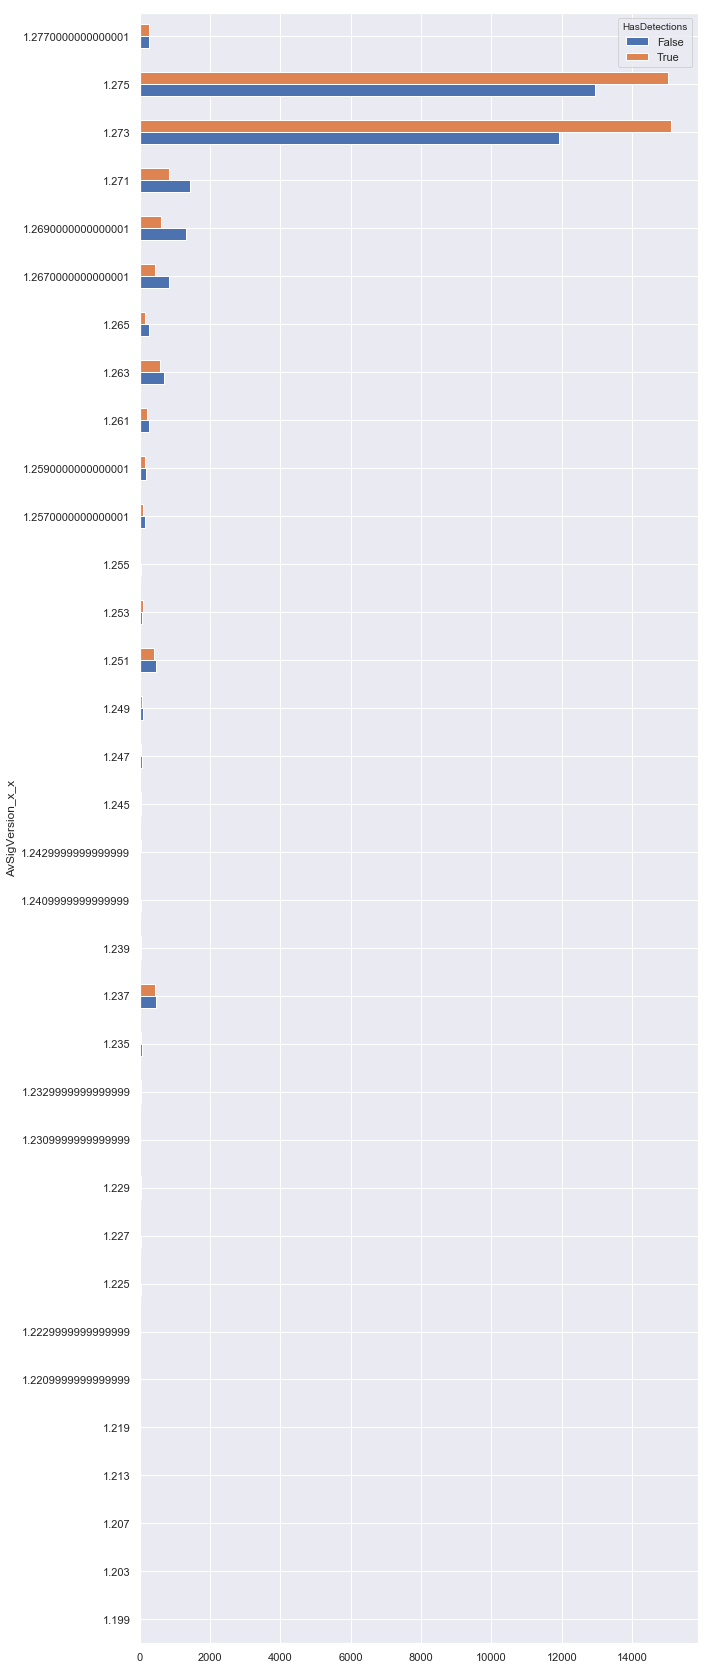

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



av_sig = pd.crosstab(
    [
        subMalware["AvSigVersion_x_x"].astype(object)
    ], 
    subMalware.HasDetections.astype(bool)
)

av_sig.plot(kind='barh' , figsize = (10,30))

#### AVProductsInstalled

The below plot for shows that **AVProductsInstalled** cateogory value 1 and 2 have different success rate for attacks on the machine.  We do believe this data is ordinal and related to the level of support the AV has or another competetive product. However, Microsoft did not release this information.

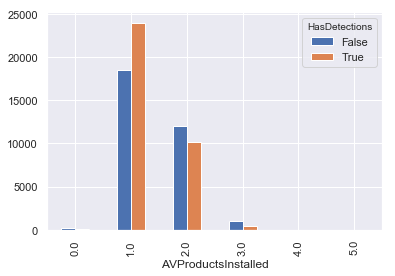

In [67]:
av_enabled = pd.crosstab(
    [
        subMalware["AVProductsInstalled"]
    ], 
    subMalware.HasDetections.astype(bool)
)

av_enabled.plot(kind='bar')# , figsize = (10,30))

#### Smart Screen
Smart screen is a feature offered on Defender that helps block malware through your web browser.  The data provided had 6 categories, however the Defender application only shows "Block", "Warn", or "Off".  We plotted the data again showing the percentage of machines enabling Smart Screen who had dections on their machine for malware.

The chance of a succesful comromise with Malware in Enable mode decreases by about 50% as compared to without SmartScreen enabled.

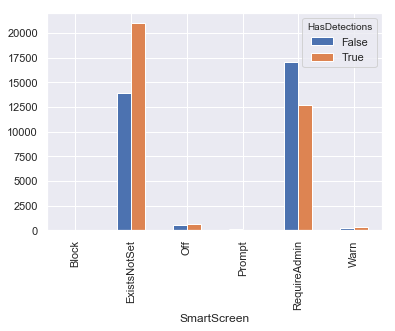

In [68]:
snart_screen = pd.crosstab(
    [
        subMalware["SmartScreen"]
    ], 
    subMalware.HasDetections.astype(bool)
)

snart_screen.plot(kind='bar')# , figsize = (10,30))

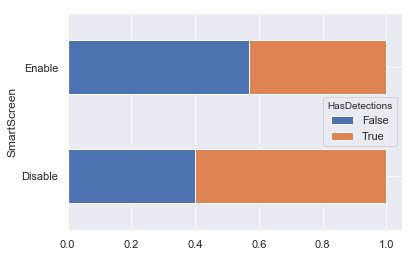

In [69]:
final_save=subMalware.copy()
df_ss=final_save[['SmartScreen','HasDetections']].copy()

df_ss.SmartScreen.replace({"Block":"Enable","ExistsNotSet":"Disable","Off" :"Disable",
                                "Prompt" :"Enable","RequireAdmin":"Enable","Warn":"Enable"},inplace=True)

df_ss.SmartScreen.value_counts()
df_grouped_ss=df_ss.groupby(by=['SmartScreen'])
detection_rate_ss=df_grouped_ss.HasDetections.sum()/df_grouped_ss.HasDetections.count()

ss = pd.crosstab(
    [df_ss["SmartScreen"].astype(object)], 
    df_ss.HasDetections.astype(bool))

ss_rate=ss.div(ss.sum(1).astype(float),axis=0)
ss_rate.plot(kind='barh',stacked=True)

<a id="Joint_Attributes"></a>
## Explore Joint Attributes

<a id="Matrix"></a>
### Hardware Configurations

Hardware configuration is investigated for joint attributes exploration. Correlation among various hardware configurations are analyzed. 

Interesting relationship is also found between machine's **FormFactor** to **ProcessorCoreCount**, **PrimaryDiskTotalCapacity**, **SystemVolumeTotalCapacity**, **TotalPhysicalRAM**, **InternalPrimaryDiagonalDisplaySizeInInches**, and **TotalResolution**.  By focusing of the median values of the mentioned Hardware configuration, classification can be made for machine Form Factor.

In [70]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

df = subMalware[np.append("Census_MDC2FormFactor",cols_numerical)].copy()
# df["Census_MDC2FormFactor"] = final["Census_MDC2FormFactor"]

# # Apply Log Transformation
df["Census_SystemVolumeTotalCapacity"] = np.log(df.Census_SystemVolumeTotalCapacity)
df["Census_TotalPhysicalRAM"] = np.log(df.Census_TotalPhysicalRAM)
df["Census_PrimaryDiskTotalCapacity"] = np.log(df.Census_PrimaryDiskTotalCapacity)

# Simplify columns names for easier visual analysis 
df.columns = [col.split("_",1)[1] for col in df.columns]

df.rename(index=str, columns={"InternalPrimaryDisplayResolutionHorizontal": "H_Resolution", 
                              "InternalPrimaryDisplayResolutionVertical": "V_Resolution",
                              "InternalPrimaryDiagonalDisplaySizeInInches": "DisplaySize"}, inplace=True)


<a id="Pairwise"></a>
Below scatter plot shows the relationship among all numerical features which are basically consists of Machine configuration: **Processor Count**, **Primary Disk Total Capacity**, **System Volume Total Capacity**, **Total Physical RAM**, **InternalPrimaryDiagonalDisplaySizeInInches**, **InternalPrimaryDisplayResolutionHorizontal**, and **InternalPrimaryDisplayResolutionVertical**.

The resolution features **InternalPrimaryDisplayResolutionHorizontal** and **InternalPrimaryDisplayResolutionVertical** is highly correlated.  In order to adjust for its correlation, we will create a new variable **TotalResolution** by multiplying the 2 values. 

There is also correlation between **SystemVolumeTotalCapacity** and **PrimaryDiskTotalCapacity**.  There also appears to be an outlier where Primary Volume is Less then System Volume.  Since both Disk Capacity values are correlated, we will select **PrimaryDiskTotalCapacity** during our modeling.

As expected as well as a relationship between **Census_ProcessorCoreCount** and **Census_TotalPhysicalRAM**.  The majority of the data is exteremly right skewed therefore the data needed to be log transformed.  Addtionaly, the visual showing of "zebra" stripes indicate this data may be better suited as a categorical variable.

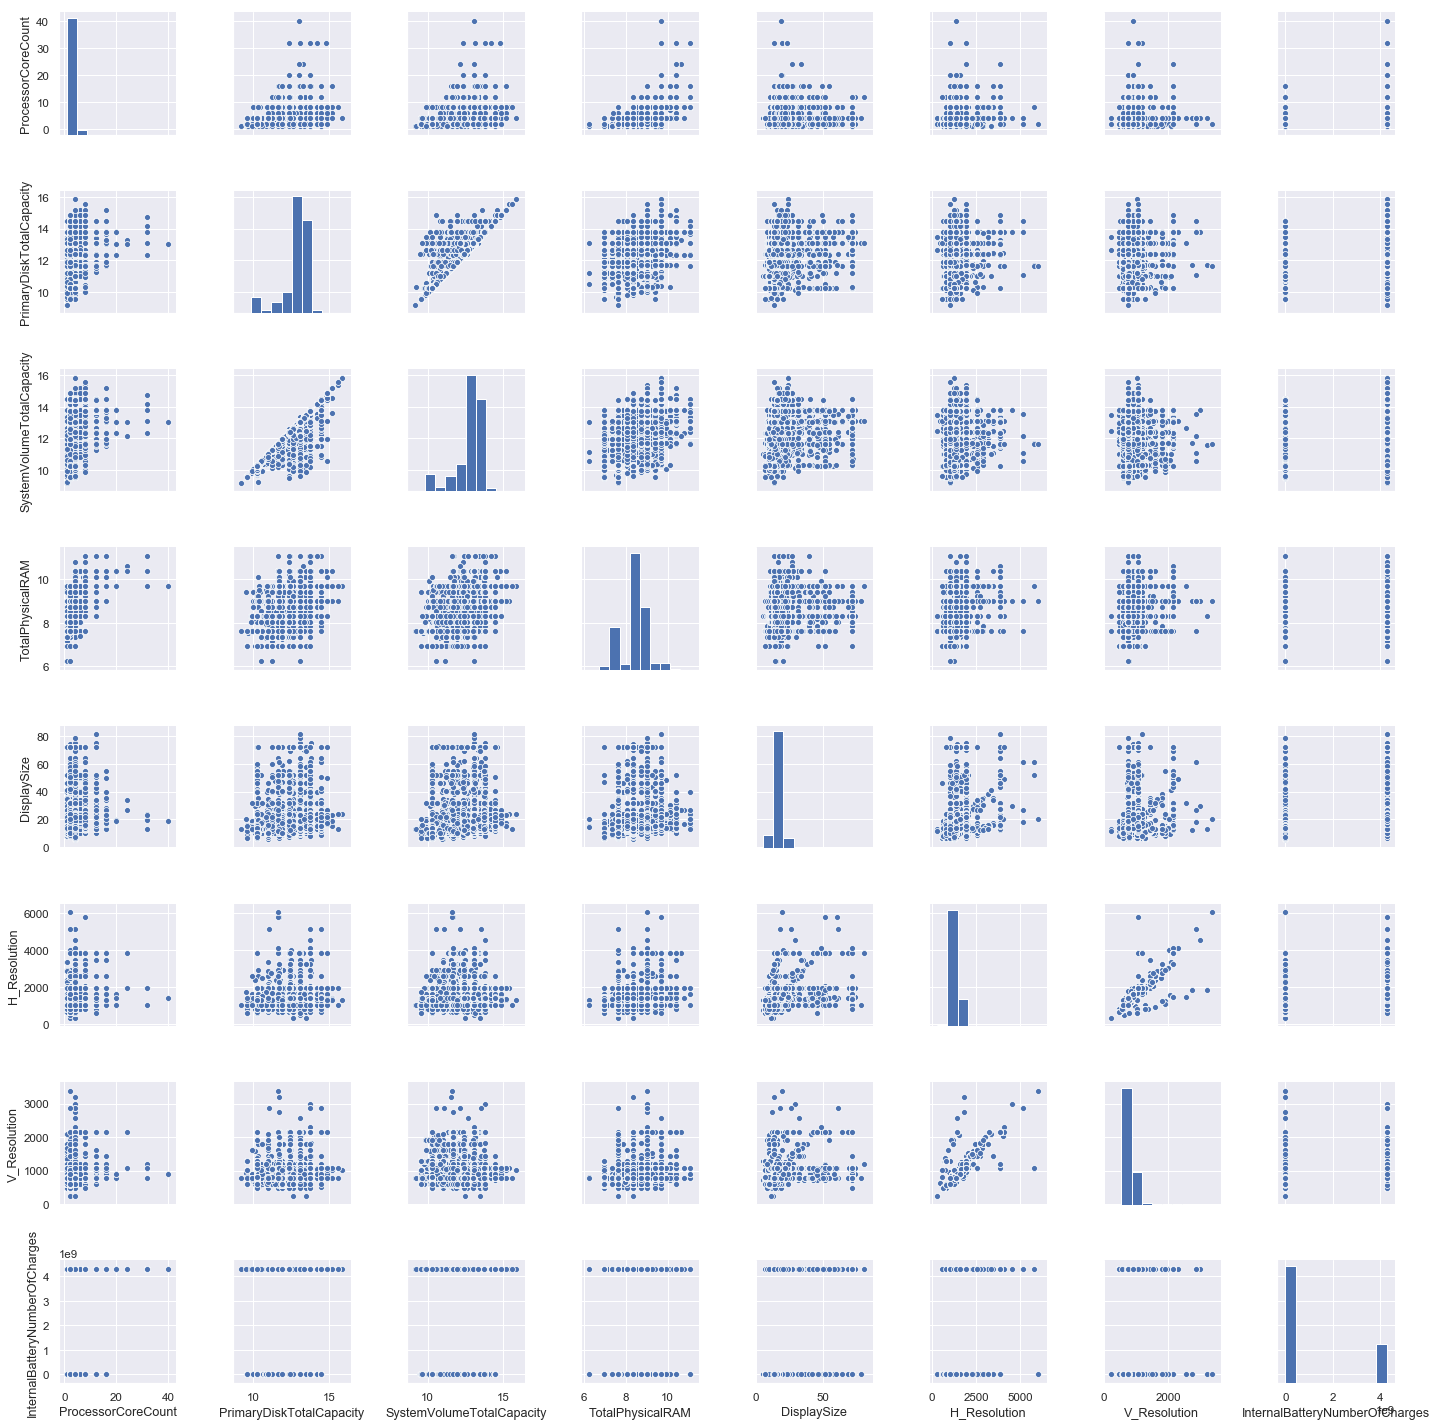

In [71]:
sns.set(font_scale=1.05)
sns.pairplot(df)
plt.show()

In [72]:
#Creating new Feature "TotalDisplayResolution"
df["TotalDisplayResolution"] = df.H_Resolution * df.V_Resolution
del df["H_Resolution"]
del df["V_Resolution"]
del df["SystemVolumeTotalCapacity"]

#### Form Factor Classification ###
By focusing of the median values of the mentioned Hardware configuration, classification can be made for machine Form Factor.

In [73]:
df_grouped = df.groupby("MDC2FormFactor").agg({
    "ProcessorCoreCount":"median",
    "PrimaryDiskTotalCapacity":"median",
    "TotalPhysicalRAM":"median",
    "DisplaySize":"median",
    "TotalDisplayResolution":"median"
})
df_grouped

ProcessorCoreCount  PrimaryDiskTotalCapacity  \
MDC2FormFactor                                                 
AllInOne                       2.0                 13.768282   
Convertible                    4.0                 13.075146   
Desktop                        4.0                 13.075146   
Detachable                     4.0                 10.303069   
LargeServer                    8.0                 11.425070   
LargeTablet                    4.0                 10.302935   
MediumServer                  12.0                 12.338644   
Notebook                       2.0                 13.075146   
PCOther                        4.0                 11.648094   
SmallServer                    4.0                 13.768248   
SmallTablet                    4.0                 10.302935   

                TotalPhysicalRAM  DisplaySize  TotalDisplayResolution  
MDC2FormFactor                                                         
AllInOne                8.317766         19.5               1440000.0  
Convertible             8.317766         13.2               1049088.0  
Desktop                 8.317766         18.9               1296000.0  
Detachable              7.624619         10.3               1024000.0  
LargeServer             9.357426         15.2               1048576.0  
LargeTablet             7.624619         11.6               1049088.0  
MediumServer            9.704061         18.9               1049088.0  
Notebook                8.317766         14.0               1049088.0  
PCOther                 7.624619         14.0               1049088.0  
SmallServer             9.234057         17.1               1044480.0  
SmallTablet             6.931472          8.0               1024000.0

#### Heatmap of Hardware Configuration ###

Below is a heatmap of the Hardware configuration.  We are able to confirm our relationship with **Processor Cores** and **Physical memory** with correlation of >0.6  We will chose to use both values as they explain different things on a machine. Other than that, there is no additional features that highly correlated.

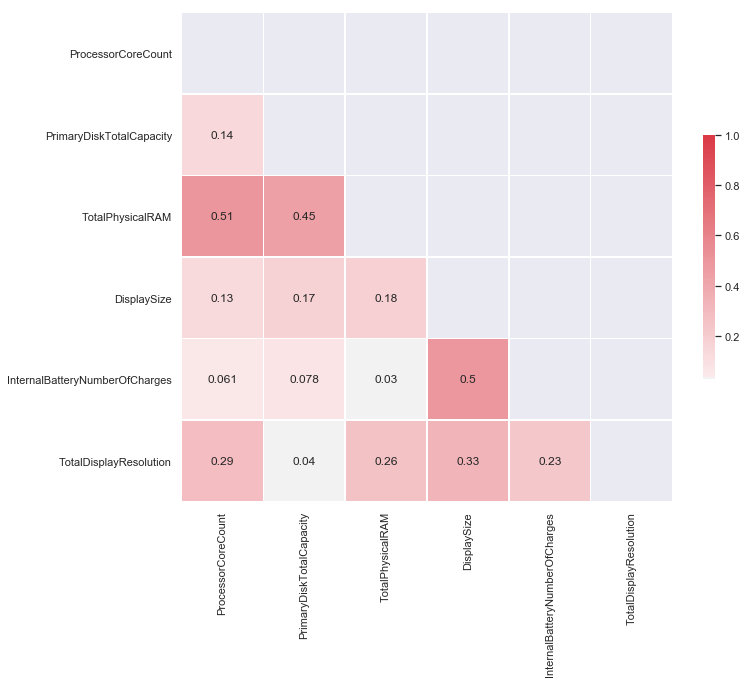

In [74]:
# Generate a mask for the upper triangle
sns.set(font_scale=1)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

#### Software Configuration
There are several fields of **AVInstalled** and **AVEnabled** that are cateogirized as 0,1,2, etc. but we are not sure what this data means.  In order to understand these fields we created a heatmap between different features (excluding builds) to determine if there could be a relationship. 
We separate the heatmap for positive correlation and negative correlation for easy viewing.

The heatmap below shows possitive correlation of ~0.6  for **FlightRing_NOT_SET** to **ActivationChannel_Volume** and **DownloadNotify** to **ActivationChannel_Retail**.

#### AV Builds
The below heatmap shows us that **EngineVersion** is **positively correlated** with **AVSigVersion**.  Through our reserch, we learned that **AVSigVersion** has the latest versions of malware definitions.  During our building of the model, we will favor **AVSigVersion** instead of **EngineVersion**.

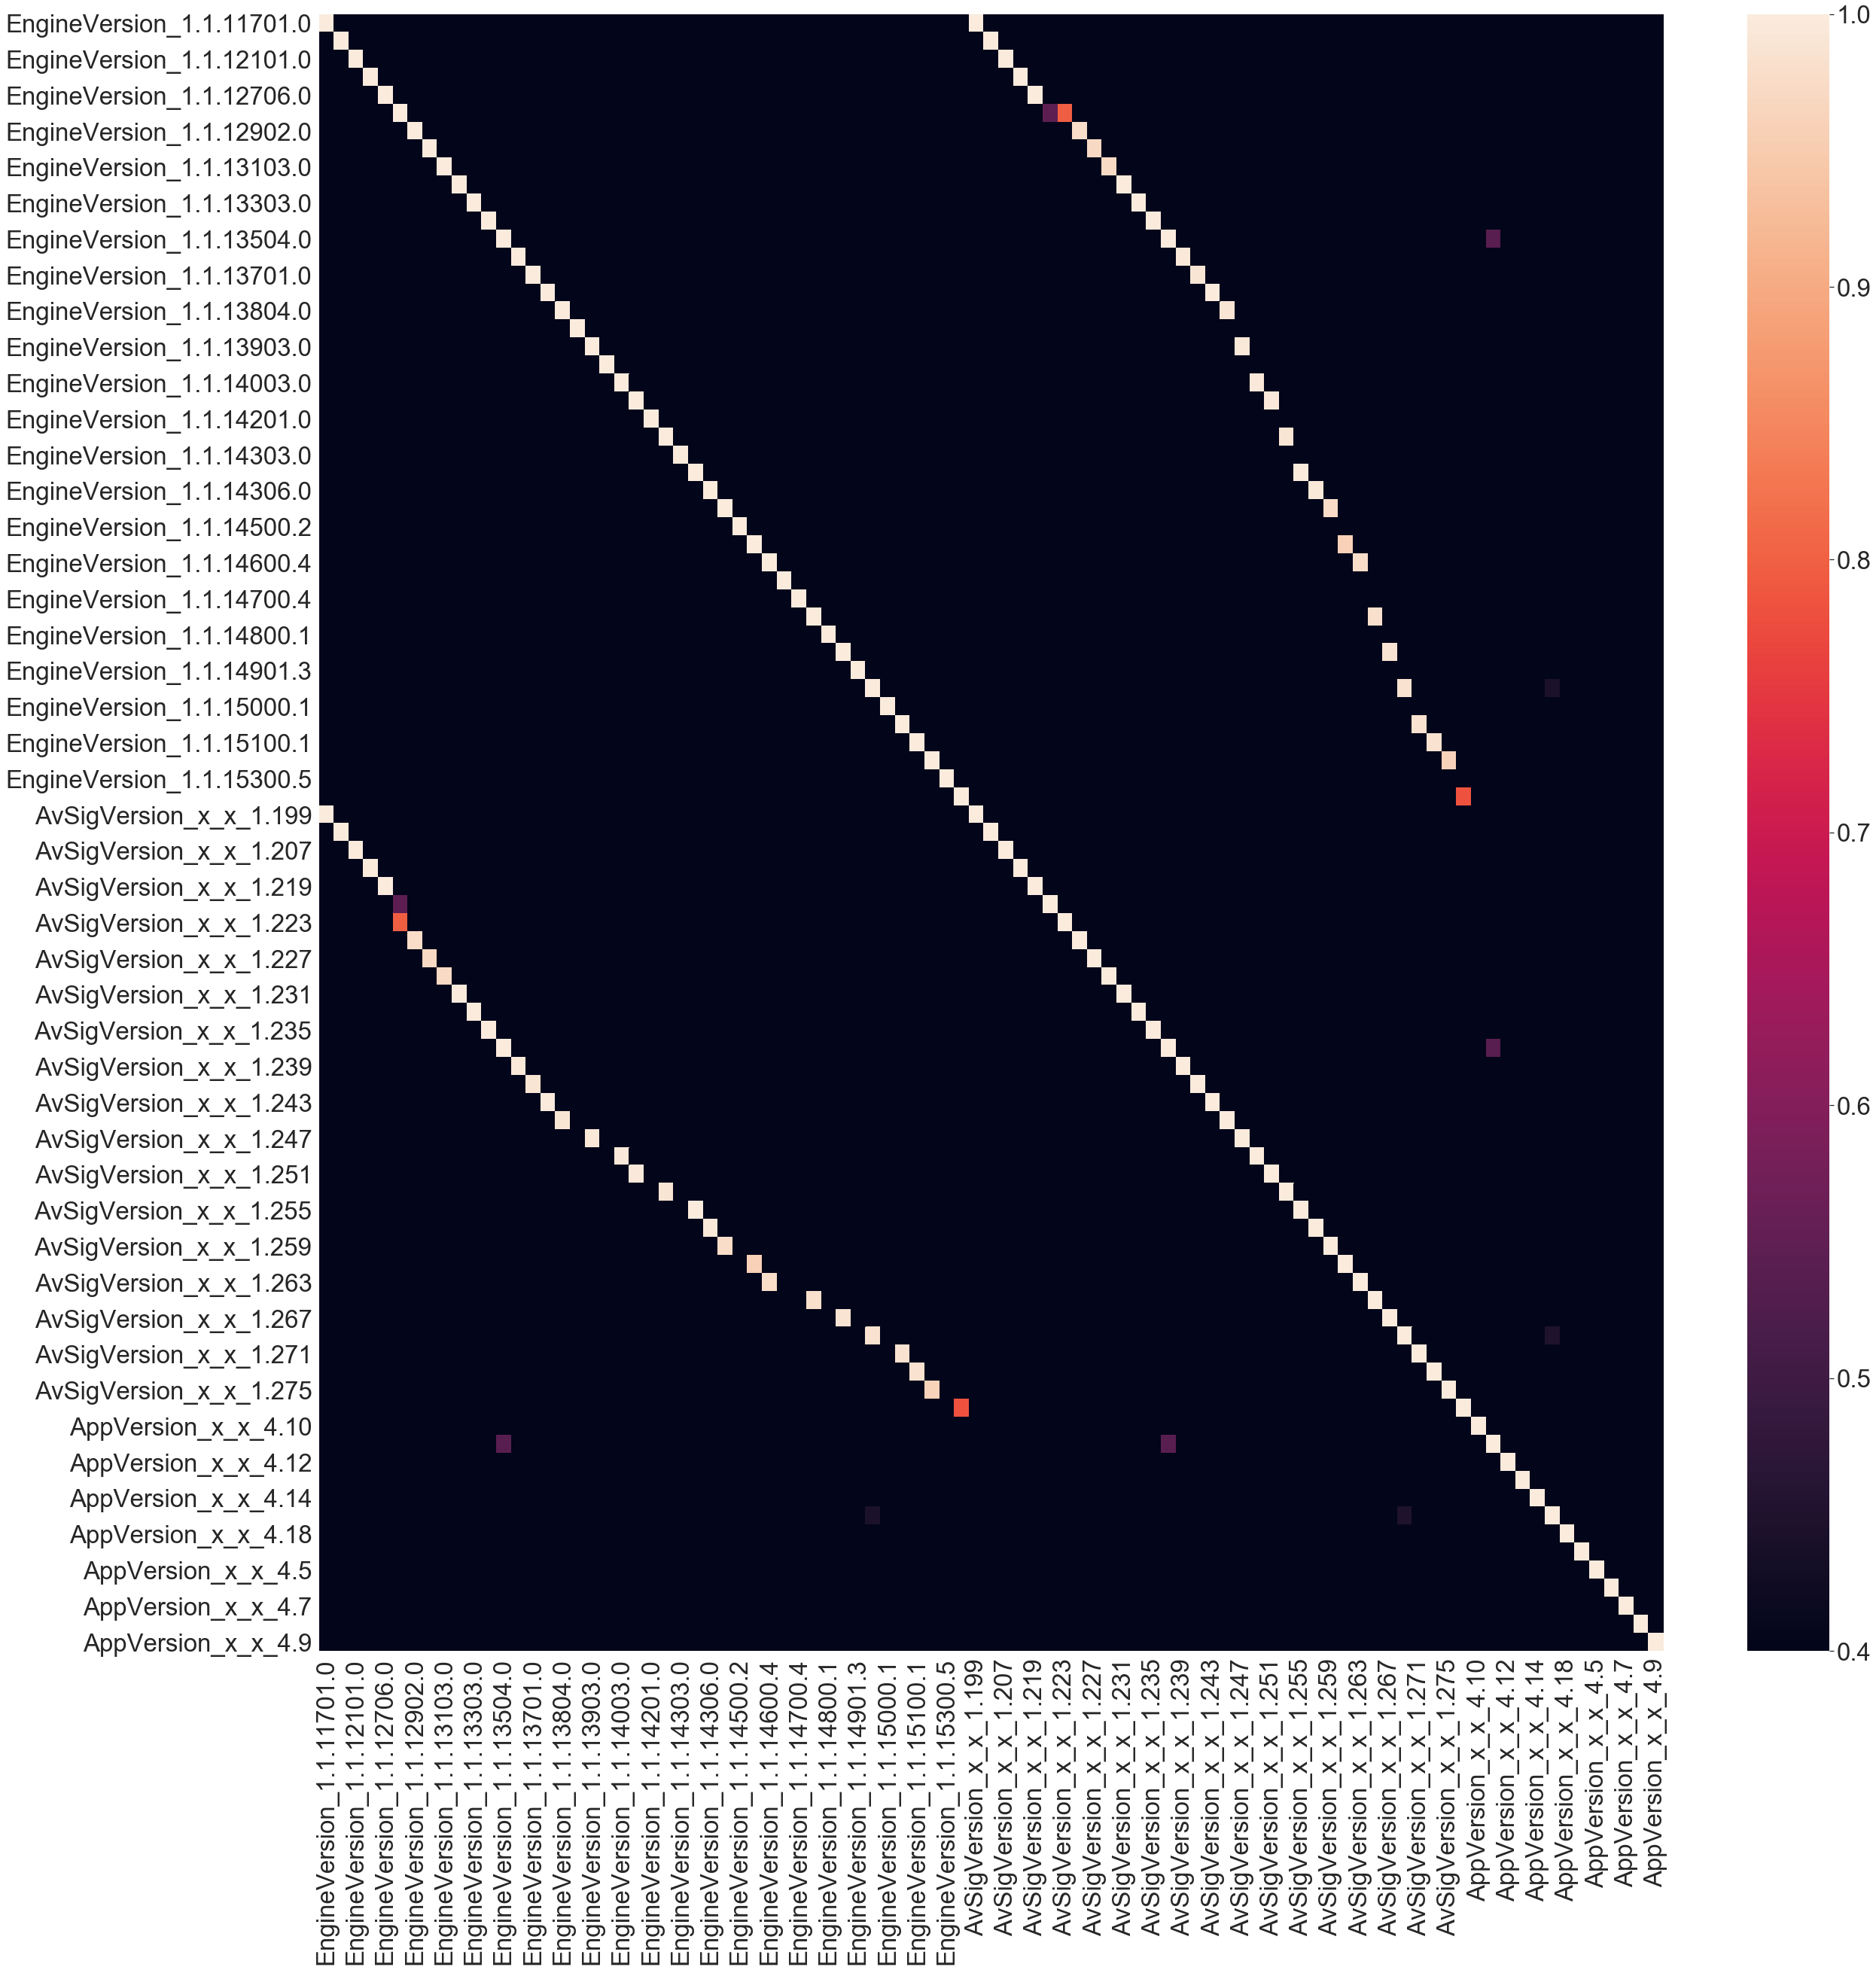

In [79]:
AppVersion_split = subMalware["AppVersion"].str.rsplit(pat=".",expand=True)
subMalware["AppVersion_x_x"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

AvSigVersion_split = subMalware["AvSigVersion"].str.rsplit(pat=".",expand=True)
subMalware["AvSigVersion_x_x"] = AvSigVersion_split.loc[:,0]+"."+AvSigVersion_split.loc[:,1]

EngineVersion = pd.get_dummies(subMalware["EngineVersion"],prefix="EngineVersion")
AppVersion_x_x = pd.get_dummies(subMalware["AppVersion_x_x"],prefix="AppVersion_x_x")
AvSigVersion_x_x = pd.get_dummies(subMalware["AvSigVersion_x_x"],prefix="AvSigVersion_x_x")


df = pd.concat(
    (
        EngineVersion,
        AvSigVersion_x_x,
        AppVersion_x_x
    ), axis=1
)

sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax, vmin=0.4)
plt.show()

Negative heatmap below shows negative correlation between **AvSigVersion 1.273 and 1.277**. This shows that a system that is upgraded to AvSigVersion1.277 is normally has the Revision of 1.273. Also, a similar negative correlation is seen for **EngineVersion 1.1.15200.1 and 1.1.15300.6**. From the previous plot, we know that is expected given the high positive correlation between AvSigVersion to EngineVersion.

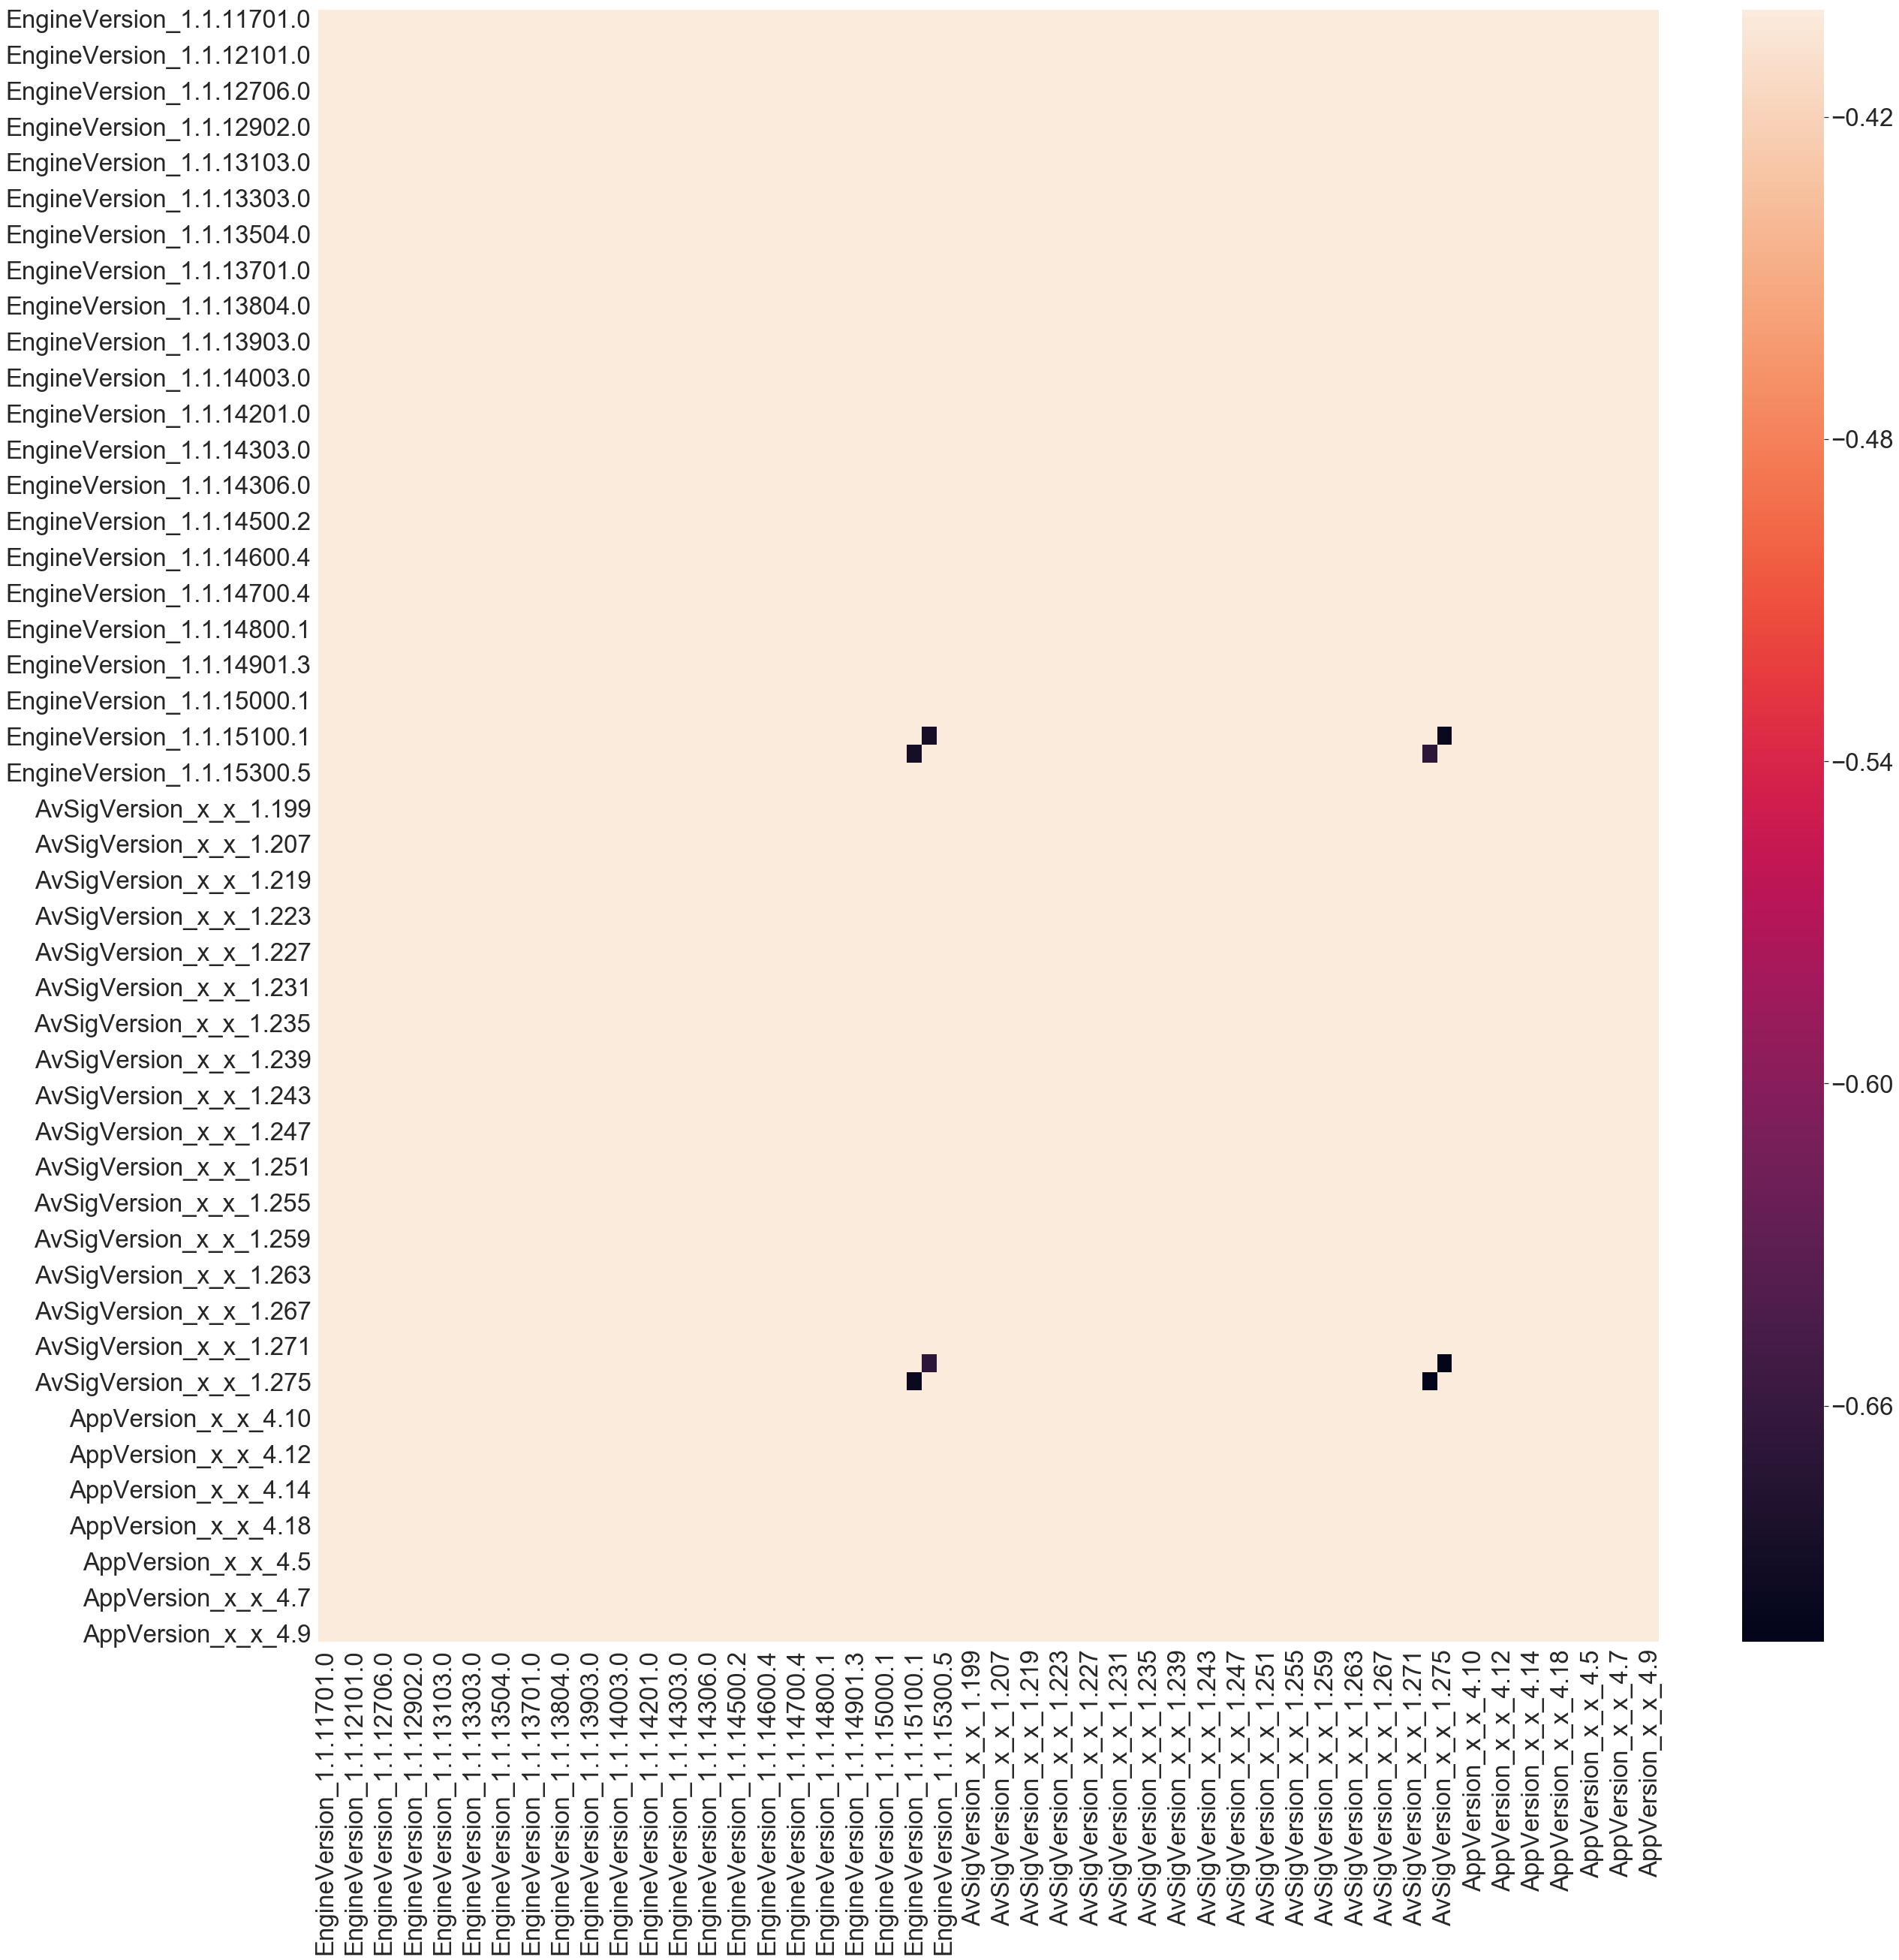

In [80]:
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), ax=ax, vmax=-0.4)
plt.show()

### Explore Attributes and Class

#### Diskspace & Memory compared to Devices

Further details from the boxplots, the density of Detections for Diskspace and Memory was analyzed..  In the violin plot for <b>Census_TotalPhysicalRAM</b> . We can visually see that Median server, as the memory increases there is a higher likely hood of vulnerability.  The remaining servers, with the exception of Large (low detections), memory is not a high factor between detections. The feature <b>Census_PrimaryDiskTotalCapacity</b> also shows a similar pattern, where if you are a server with more diskspace you are more likely to be attacked by malware.

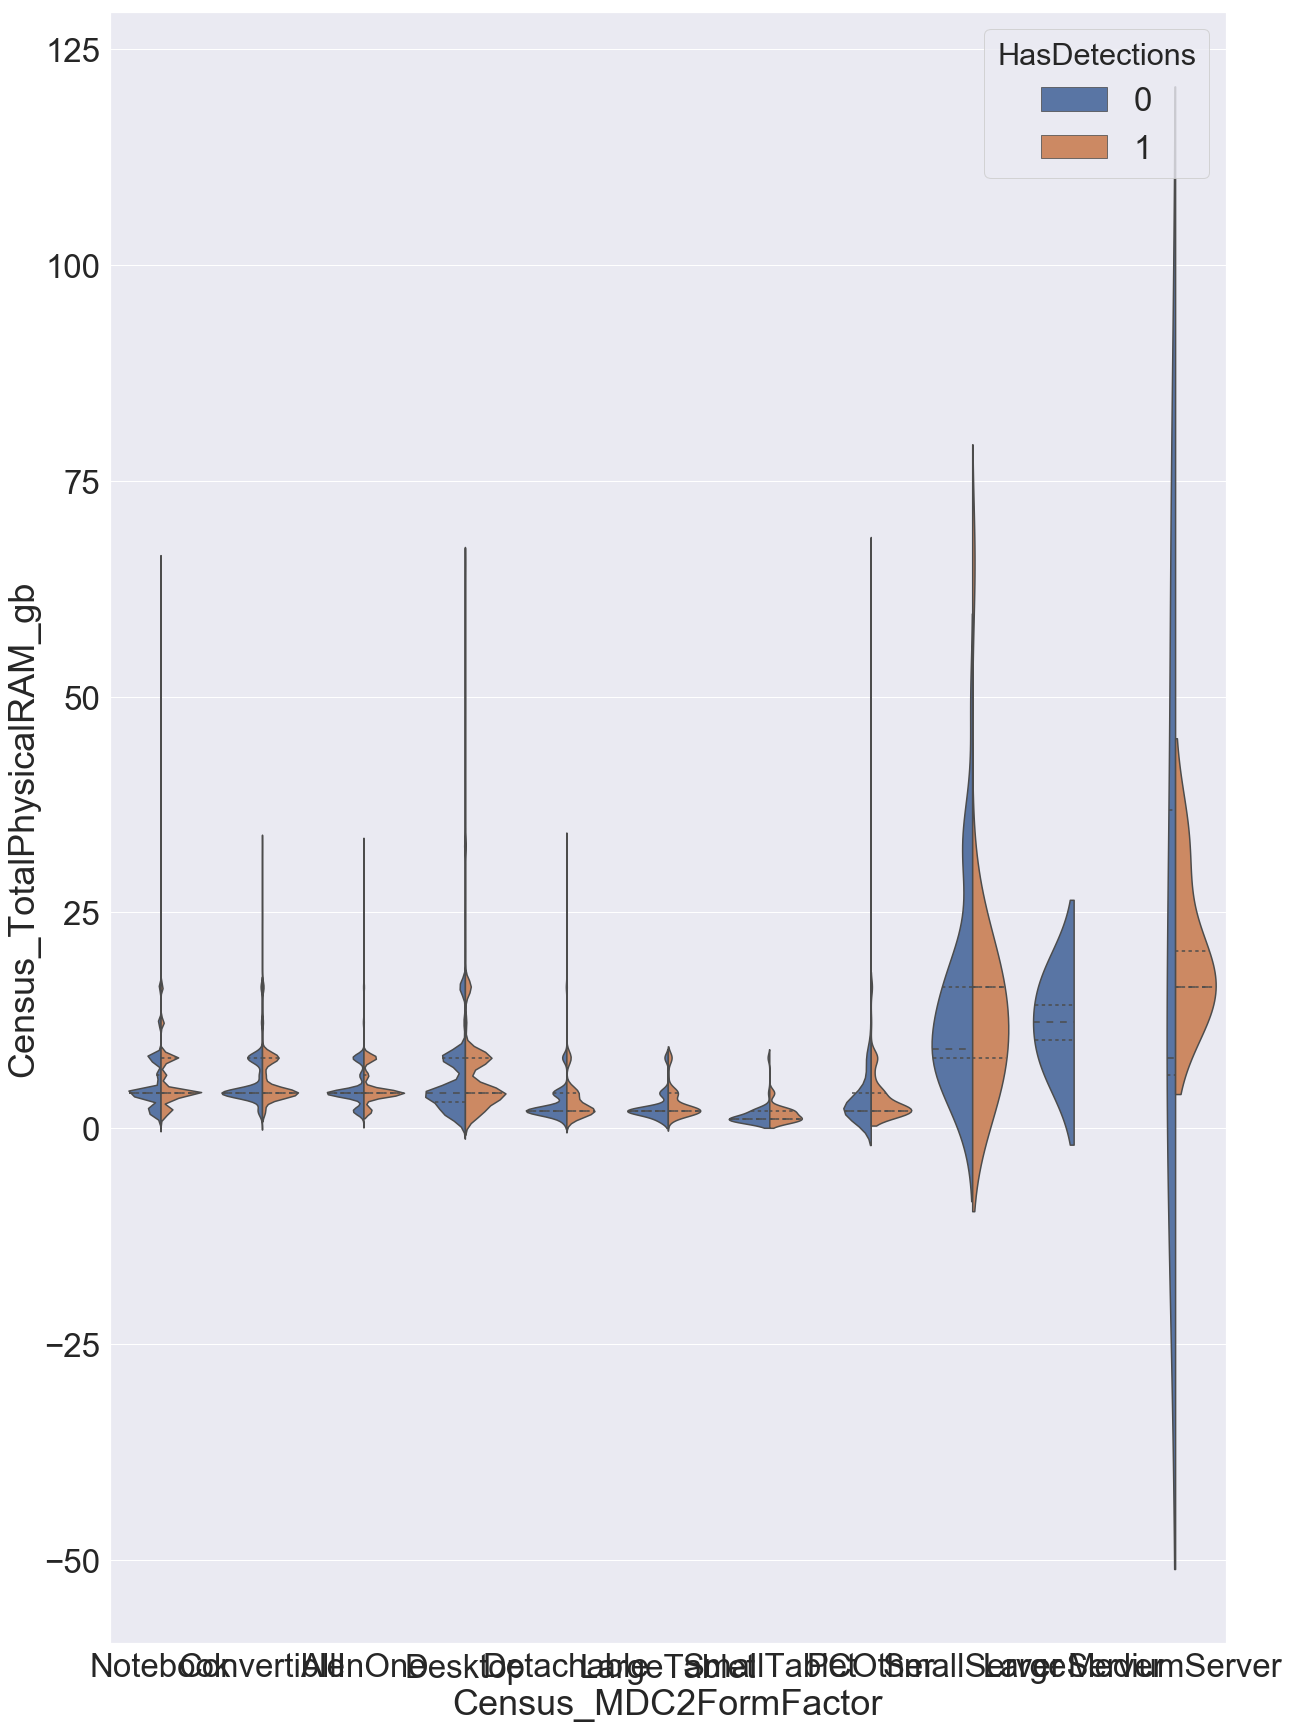

In [93]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))

subMalware["Census_TotalPhysicalRAM_gb"] = subMalware.Census_TotalPhysicalRAM / 1000

sns.violinplot(x="Census_MDC2FormFactor", y="Census_TotalPhysicalRAM_gb", hue="HasDetections", data=subMalware, 
               split=True, inner="quart")

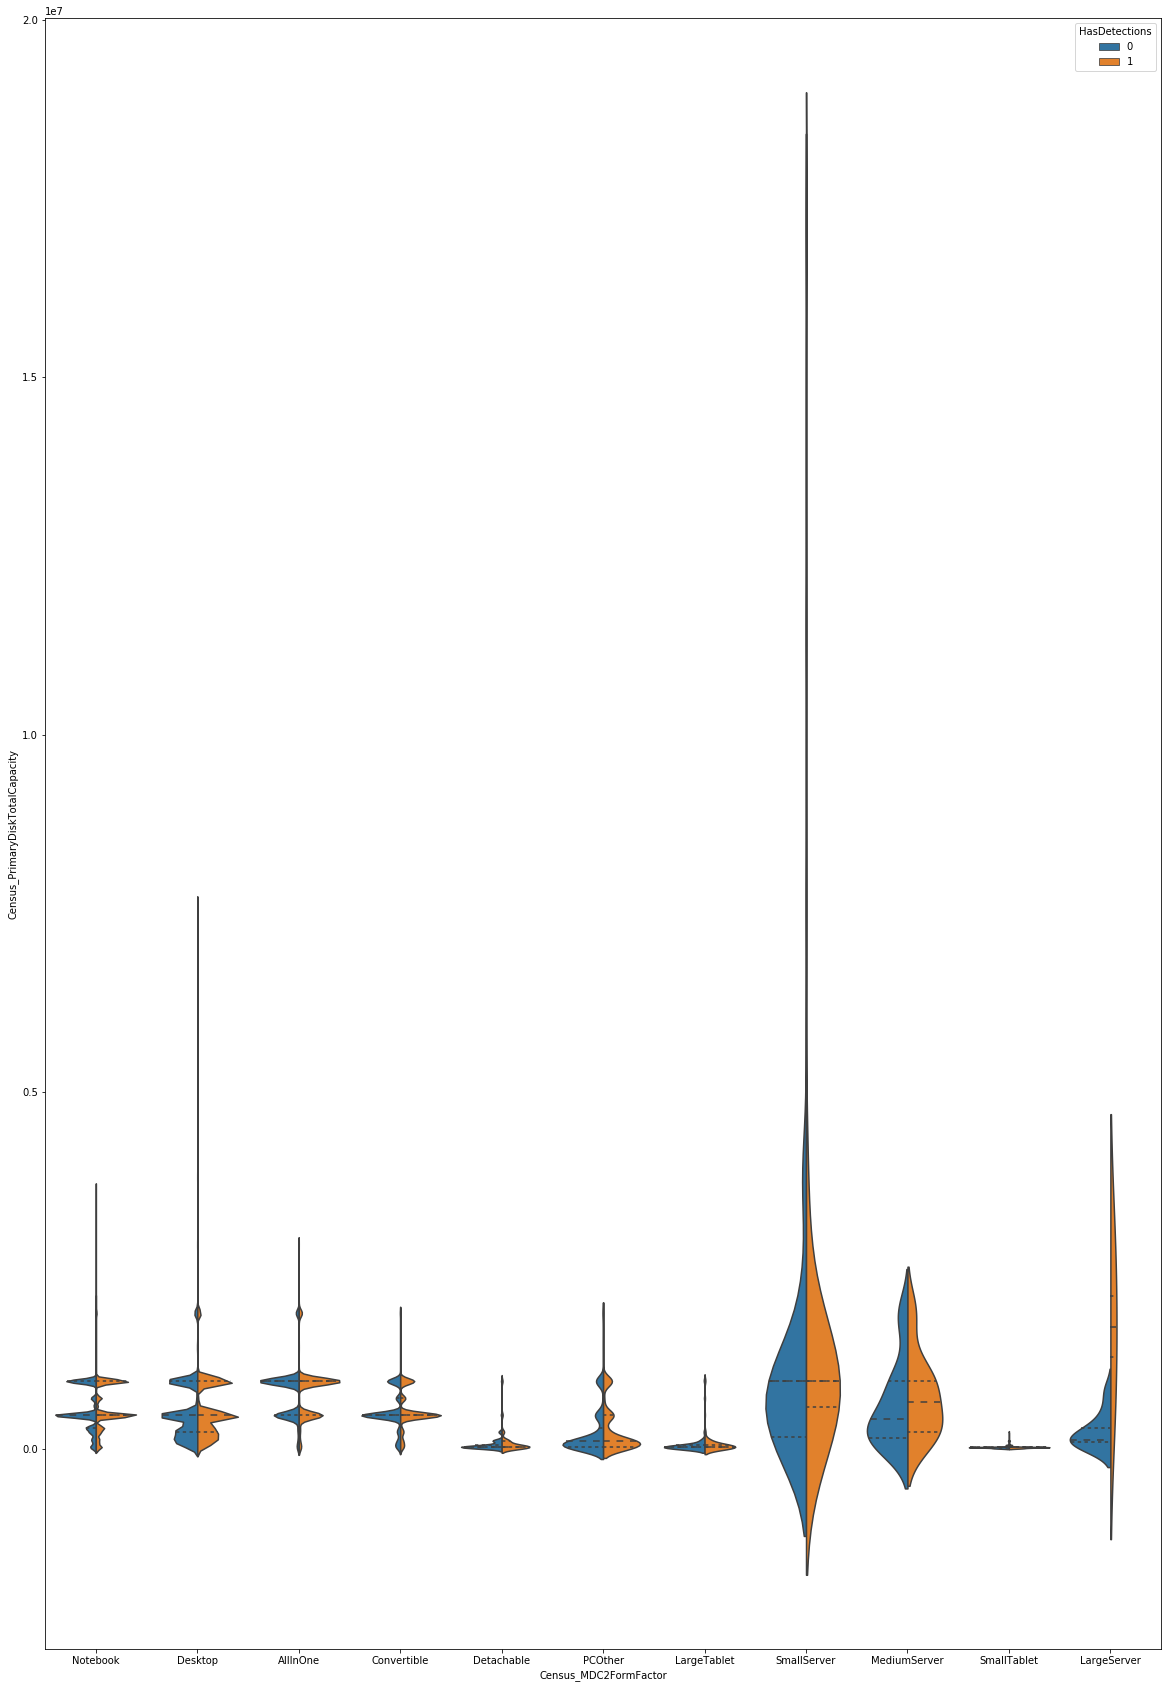

In [236]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(20,30))
sns.violinplot(x="Census_MDC2FormFactor", y="Census_PrimaryDiskTotalCapacity", hue="HasDetections", data=final, 
               split=True, inner="quart")

#### Defender Version Details
While researching different builds of Defender, we learned there is the version of the actual Application, **AppVersion**, along with definition version to detect Malware, **AvSigVersion**, and Engine Version **EngineVersion**.  In order to understand its relationship between detections, we compared combinations of different versions.  Visually the 2 largest groups of version combinations has the make chance for an attack.  This may be an indication that attackers know what the adoption rate for versions and targeting these versions.

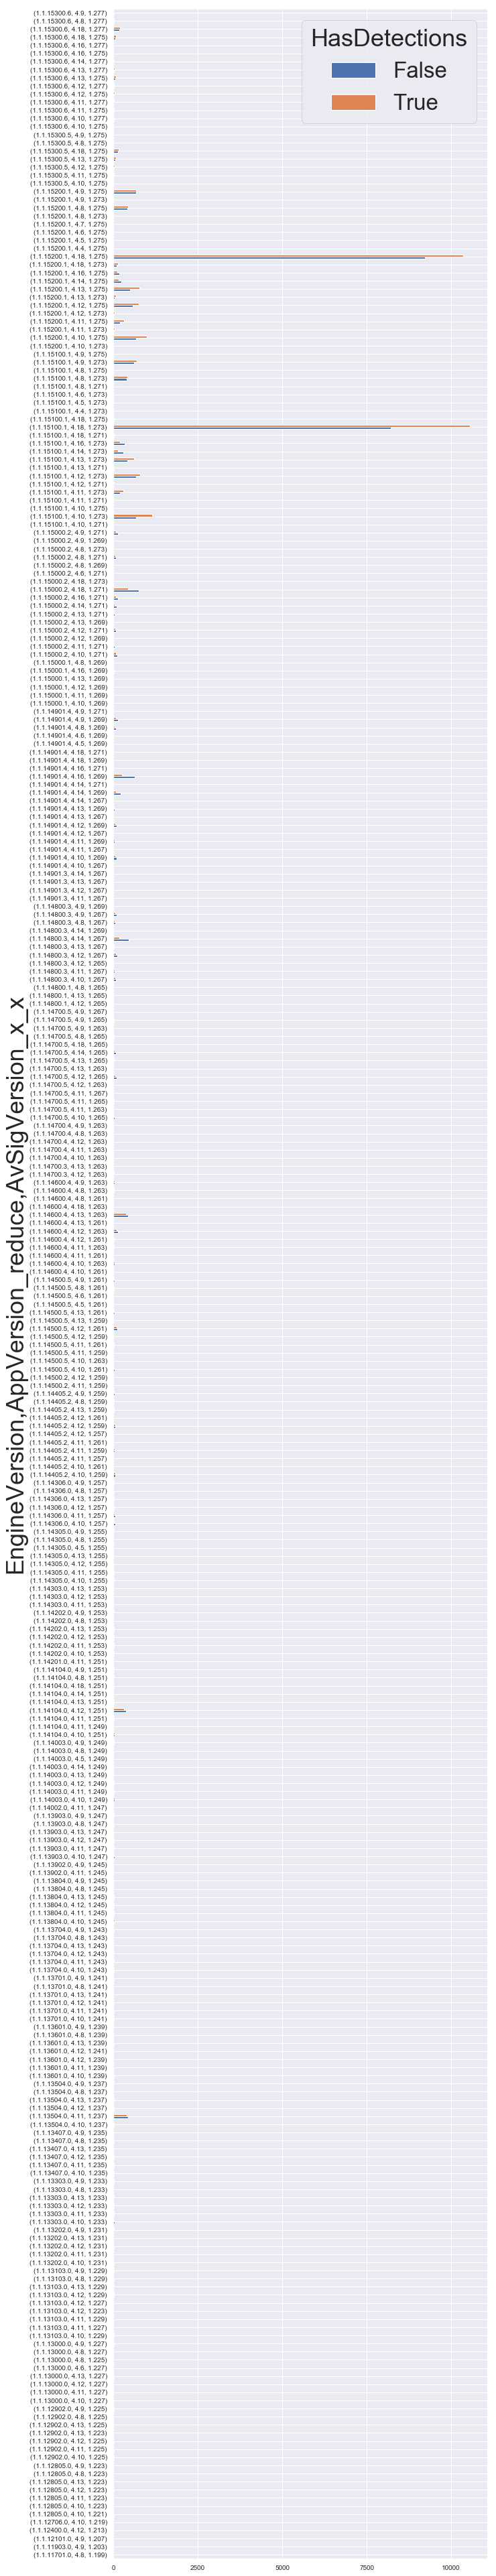

In [87]:
# get only the 4.X values
AppVersion_split = subMalware["AppVersion"].str.rsplit(pat=".",expand=True)
subMalware["AppVersion_reduce"] = AppVersion_split.loc[:,0]+"."+AppVersion_split.loc[:,1]#+"."+AppVersion_split.loc[:,2]

defenders = pd.crosstab(
    [
        subMalware["EngineVersion"].fillna(1),
        subMalware["AppVersion_reduce"].fillna(1),
        subMalware["AvSigVersion_x_x"]
    ], 
    subMalware.HasDetections.astype(bool)
)

defenders.plot(kind='barh',stacked=False, figsize = (10,70), fontsize = 10)

#### Antivirus and Firewall

Through domain knowledge we know firewall is important to prevent attacks.  In order to visualize if a Firewall is an important feature, we grouped the variable **Firewall** with **AVProductsEnabled** to determine its effectiveness.  The rate for each group is very similar.  This is because user behavior indicates more attacks are done by downloads versus straight attacks on the operating system.

# Modeling and Evaluation 1 (Train and Adjust Parameters)<a id="ME_1"></a>


** Run Model K-modes. Clusters: 1-20, 50, 75, 100

In [90]:
import numpy as np
from kmodes.kmodes import KModes

data = model_data.values
y = subMalware['HasDetections'].values

range_cluster=7

clusters = np.zeros((range_cluster-1, len(y)), dtype=int)
km_cost = np.zeros((range_cluster-1), dtype=int)
km_n_iter = np.zeros((range_cluster-1), dtype=int)

for n in (2, 4, 6, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 100):
    km = KModes(n_clusters=n, init='Huang', n_init=5, verbose=1)
    clusters[n-2] = km.fit_predict(data)
    print('k-modes (Huang) centroids for ', n, ' clusters:')
    #print(km_huang_2.cluster_centroids_)
    # Print training statistics
    km_cost[n-2]=km.cost_
    km_n_iter[n-2]=km.n_iter_
    print('Final training cost: {}'.format(km.cost_))
    print('Training iterations: {}'.format(km.n_iter_))
    df_clus = pd.DataFrame(data=[y,clusters[n-2]]).T
    df_clus.columns=["HasDetections", "Cluster"]
    Cluster_table = pd.crosstab(df_clus["Cluster"], df_clus.HasDetections.astype(bool))
    Cluster_table['count']=Cluster_table[True]+Cluster_table[False]
    Cluster_table['ratio']=(Cluster_table[True]/Cluster_table['count'])*100
    print(Cluster_table)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18108, cost: 824306.0
Run 1, iteration: 2/100, moves: 3030, cost: 824306.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17541, cost: 821430.0
Run 2, iteration: 2/100, moves: 3402, cost: 821430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4495, cost: 834792.0
Run 3, iteration: 2/100, moves: 0, cost: 834792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20380, cost: 831682.0
Run 4, iteration: 2/100, moves: 10260, cost: 819906.0
Run 4, iteration: 3/100, moves: 10136, cost: 812027.0
Run 4, iteration: 4/100, moves: 2325, cost: 812027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17531, cost: 823275.0
Run 5, iterati

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31431, cost: 631661.0
Run 1, iteration: 2/100, moves: 14561, cost: 627497.0
Run 1, iteration: 3/100, moves: 1993, cost: 627497.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 30058, cost: 628058.0
Run 2, iteration: 2/100, moves: 9623, cost: 627259.0
Run 2, iteration: 3/100, moves: 361, cost: 627259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32311, cost: 629287.0
Run 3, iteration: 2/100, moves: 9108, cost: 626615.0
Run 3, iteration: 3/100, moves: 967, cost: 626615.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 27396, cost: 630348.0
Run 4, iteration: 2/100, moves: 8250, cost: 626094.0
Run 4, iteration: 3/100, moves: 2311, cost: 626094.0
Init: initializing centroids
Init: initia

IndexError: index 23 is out of bounds for axis 0 with size 19

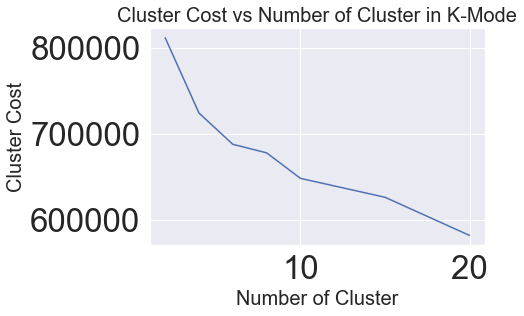

In [110]:
c_range = [0,2, 4, 6, 8, 13, 18]
km_cost2 = km_cost[c_range]
plt.plot([2,4,6,8,10,15,20], km_cost2)
plt.ylabel("Cluster Cost", fontsize=20)
plt.xlabel("Number of Cluster", fontsize=20)
plt.title("Cluster Cost vs Number of Cluster in K-Mode", fontsize=20)
plt.show()

In [288]:
# Create a Sub Sample of our malware data
rowCounts = len(malware)
k = .02 

np.random.seed(42)
finalSampleIndex = np.random.choice(rowCounts, int(rowCounts*k), replace=False)

subMalware = malware.iloc[finalSampleIndex,:].reset_index()
del subMalware['index']

print( "Our subsample data has the following number of rows: ", len(subMalware) )

pd.options.display.max_rows = 999
model_data = pd.concat(
    (    
        subMalware[cols_booleans].astype(object),
#        subMalware[cols_numerical],
        subMalware[cols_categorical].astype(object),
        subMalware[cols_categorical_large].astype(object)
    ), axis = 1)

model_data.drop(['OsBuildLab', 'Census_OSVersion'], axis=1, inplace=True)

print("Total Features: ", model_data.shape )



Our subsample data has the following number of rows:  6658
Total Features:  (6658, 35)


In [289]:
data = model_data.values
y = subMalware['HasDetections'].values

In [290]:
range_cluster=9

clusters2 = np.zeros((range_cluster, len(y)), dtype=int)
km_cost2 = np.zeros((range_cluster), dtype=int)
km_n_iter2 = np.zeros((range_cluster), dtype=int)
m=0
for n in (2, 3, 5, 8, 13, 21, 34, 55, 89):
    km2 = KModes(n_clusters=n, init='Huang', n_init=5, verbose=1)
    clusters2[m] = km2.fit_predict(data)
    print('k-modes (Huang) centroids for ', n, ' clusters:')
    #print(km_huang_2.cluster_centroids_)
    # Print training statistics
    km_cost2[m]=km2.cost_
    km_n_iter2[m]=km2.n_iter_
    print('Final training cost: {}'.format(km2.cost_))
    print('Training iterations: {}'.format(km2.n_iter_))
    df_clus = pd.DataFrame(data=[y,clusters2[m]]).T
    df_clus.columns=["HasDetections", "Cluster"]
    Cluster_table = pd.crosstab(df_clus["Cluster"], df_clus.HasDetections.astype(bool))
    Cluster_table['count']=Cluster_table[True]+Cluster_table[False]
    Cluster_table['ratio']=(Cluster_table[True]/Cluster_table['count'])*100
    print(Cluster_table)
    m=m+1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1043, cost: 113531.0
Run 1, iteration: 2/100, moves: 578, cost: 112978.0
Run 1, iteration: 3/100, moves: 534, cost: 111817.0
Run 1, iteration: 4/100, moves: 1049, cost: 108349.0
Run 1, iteration: 5/100, moves: 691, cost: 108349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1047, cost: 109567.0
Run 2, iteration: 2/100, moves: 0, cost: 109567.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1419, cost: 107688.0
Run 3, iteration: 2/100, moves: 528, cost: 106996.0
Run 3, iteration: 3/100, moves: 555, cost: 106996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1145, cost: 108626.0
Run 4, iteration: 2/100, moves: 193, cost: 108552.0
Run 4, iteration: 3/100, moves: 9, cost: 108552.0
Ini

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2597, cost: 80269.0
Run 1, iteration: 2/100, moves: 661, cost: 80133.0
Run 1, iteration: 3/100, moves: 69, cost: 80131.0
Run 1, iteration: 4/100, moves: 3, cost: 80131.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2442, cost: 81668.0
Run 2, iteration: 2/100, moves: 1250, cost: 81181.0
Run 2, iteration: 3/100, moves: 336, cost: 81110.0
Run 2, iteration: 4/100, moves: 50, cost: 81110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2392, cost: 79591.0
Run 3, iteration: 2/100, moves: 1093, cost: 79336.0
Run 3, iteration: 3/100, moves: 233, cost: 79184.0
Run 3, iteration: 4/100, moves: 53, cost: 79184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2447, cost: 80921.0
Run 4, iteration

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2797, cost: 68770.0
Run 1, iteration: 2/100, moves: 909, cost: 68336.0
Run 1, iteration: 3/100, moves: 202, cost: 68293.0
Run 1, iteration: 4/100, moves: 47, cost: 68228.0
Run 1, iteration: 5/100, moves: 21, cost: 68228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2563, cost: 69142.0
Run 2, iteration: 2/100, moves: 1164, cost: 68208.0
Run 2, iteration: 3/100, moves: 599, cost: 67926.0
Run 2, iteration: 4/100, moves: 175, cost: 67864.0
Run 2, iteration: 5/100, moves: 36, cost: 67860.0
Run 2, iteration: 6/100, moves: 2, cost: 67860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2635, cost: 69149.0
Run 3, iteration: 2/100, moves: 1156, cost: 68062.0
Run 3, iteration: 3/100, moves: 468, cost: 67767.0
Run 3, iteration: 4/100, moves: 224, cost: 676

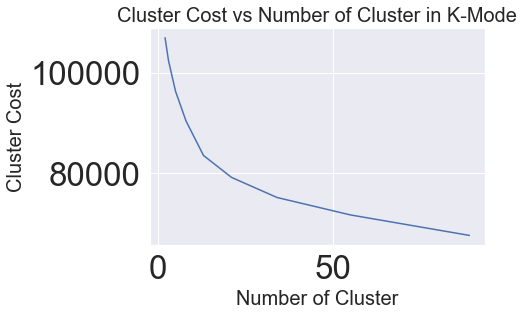

In [291]:
plt.plot([2, 3, 5, 8, 13, 21, 34, 55, 89], km_cost2[range(0,9,1)])
plt.ylabel("Cluster Cost", fontsize=20)
plt.xlabel("Number of Cluster", fontsize=20)
plt.title("Cluster Cost vs Number of Cluster in K-Mode", fontsize=20)
plt.show()

In [212]:
clusters2_df = pd.DataFrame({'Clus2':clusters[0], 'Clus3':clusters[1], 'Clus5':clusters[2], 'Clus8':clusters[3], 'Clus13':clusters[4], 'Clus21':clusters[5], 'Clus34':clusters[6], 'Clus55':clusters[7], 'Clus89':clusters[8]})
subMalware_cluster2 = pd.concat([subMalware, clusters2_df], axis=1)
print("Dataframe subMalware", subMalware.shape)
print("Dataframe subMalware with Clusters", subMalware_cluster2.shape)
subMalware_cluster.to_csv("data/subMalware_cluster2.csv", index=False)

Dataframe subMalware (66582, 49)
Dataframe subMalware with Clusters (66582, 58)


In [214]:
test = subMalware[cols_categorical]

In [216]:
test2 = subMalware[cols_categorical_large]

In [217]:
test2

AVProductStatesIdentifier CityIdentifier  \
0                         53447              0   
1                         51954          92213   
2                         53447          99999   
3                         53447          98087   
4                         53447          92213   
5                         53447         165673   
6                         62773          98087   
7                         53447         147813   
8                         99999          90129   
9                         53447         148415   
10                         7945         156098   
11                        53447          92213   
12                        53447         117555   
13                        53447          92213   
14                        53447          92213   
15                        51837          65808   
16                        53447         163380   
17                        53447          56198   
18                        53447         127991   
19                        53447          69053   
20                        53447         147514   
21                        53447          92213   
22                        99999         102055   
23                        53447          23369   
24                        53447          92213   
25                        53447          92213   
26                        53447          92213   
27                        53447          35270   
28                         7945         128788   
29                        53447         155113   
30                        53447         144176   
31                        53447         150141   
32                        53447          23687   
33                        53447          34713   
34                        53447          41313   
35                         7945          34713   
36                        22728              0   
37                        53447          92213   
38                        49480         116277   
39                        53447          41313   
40                        47238          92213   
41                        53447          23369   
42                        51954          41313   
43                         7681          92213   
44                        53447          34713   
45                        53447          99999   
46                         7945         163380   
47                        53447          66620   
48                        62773          92213   
49                        53447          30461   
50                        53447          23687   
51                        53447          92213   
52                        51954          56198   
53                        53447            629   
54                        24213         116277   
55                        53447         116277   
56                        16736          95303   
57                         7945          92213   
58                        53447          92213   
59                        53447         147813   
60                        53447          31512   
61                        53447          31143   
62                        53447          34809   
63                        62773          92213   
64                        49480         147039   
65                        13513              0   
66                        53447          30507   
67                        46669         116277   
68                        23657         116277   
69                        53447         128918   
70                        53447          41313   
71                        53447          34713   
72                        53447          29111   
73                        53447          34713   
74                        53447         116462   
75                        53447          29111   
76                        53447         148415   
77                        53447          41313   
78                        53447          63273   
79    

In [304]:
subMalware_Large = subMalware[cols_categorical_large].astype(object).copy()
subMalware_Large.drop(['OsBuildLab', 'Census_OSVersion'], axis=1, inplace=True)

data = subMalware_Large.values

y = subMalware['HasDetections'].values

In [305]:
range_cluster=9

clusters2 = np.zeros((range_cluster, len(y)), dtype=int)
km_cost2 = np.zeros((range_cluster), dtype=int)
km_n_iter2 = np.zeros((range_cluster), dtype=int)
m=0
for n in (2, 3, 5, 8, 13, 21, 34, 55, 89):
    km2 = KModes(n_clusters=n, init='Huang', n_init=5, verbose=1)
    clusters2[m] = km2.fit_predict(data)
    print('k-modes (Huang) centroids for ', n, ' clusters:')
    #print(km_huang_2.cluster_centroids_)
    # Print training statistics
    km_cost2[m]=km2.cost_
    km_n_iter2[m]=km2.n_iter_
    print('Final training cost: {}'.format(km2.cost_))
    print('Training iterations: {}'.format(km2.n_iter_))
    df_clus = pd.DataFrame(data=[y,clusters2[m]]).T
    df_clus.columns=["HasDetections", "Cluster"]
    Cluster_table = pd.crosstab(df_clus["Cluster"], df_clus.HasDetections.astype(bool))
    Cluster_table['count']=Cluster_table[True]+Cluster_table[False]
    Cluster_table['ratio']=(Cluster_table[True]/Cluster_table['count'])*100
    print(Cluster_table)
    m=m+1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1327, cost: 39549.0
Run 1, iteration: 2/100, moves: 348, cost: 39549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1205, cost: 39082.0
Run 2, iteration: 2/100, moves: 0, cost: 39082.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1744, cost: 39070.0
Run 3, iteration: 2/100, moves: 0, cost: 39070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 519, cost: 40790.0
Run 4, iteration: 2/100, moves: 0, cost: 40790.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1060, cost: 39247.0
Run 5, iteration: 2/100, moves: 0, cost: 39247.0
Best run was number 3
k-modes (Huang) centroids for  2  clusters:
Final training cost: 39070.0

Starting iterations...
Run 4, iteration: 1/100, moves: 2185, cost: 31797.0
Run 4, iteration: 2/100, moves: 347, cost: 31778.0
Run 4, iteration: 3/100, moves: 33, cost: 31778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2526, cost: 31546.0
Run 5, iteration: 2/100, moves: 488, cost: 31485.0
Run 5, iteration: 3/100, moves: 36, cost: 31485.0
Best run was number 2
k-modes (Huang) centroids for  21  clusters:
Final training cost: 31241.0
Training iterations: 4
HasDetections  False  True  count      ratio
Cluster                                     
0                433   487    920  52.934783
1                311   354    665  53.233083
2                350   442    792  55.808081
3                395   453    848  53.419811
4                232   212    444  47.747748
5                 67    80    147  54.421769
6                 83   111    194  57.216495
7                195   244    439  55.580866
8                177  

Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2093, cost: 27363.0
Run 1, iteration: 2/100, moves: 426, cost: 27234.0
Run 1, iteration: 3/100, moves: 109, cost: 27206.0
Run 1, iteration: 4/100, moves: 24, cost: 27206.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1939, cost: 27000.0
Run 2, iteration: 2/100, moves: 130, cost: 26995.0
Run 2, iteration: 3/100, moves: 3, cost: 26995.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1979, cost: 27670.0
Run 3, iteration: 2/100, moves: 503, cost: 27441.0
Run 3, iteration: 3/100, moves: 111, cost: 27421.0
Run 3, iteration: 4/100, moves: 9, cost: 27421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2332, cost: 27105.0
Run 4, iteration: 2/100, moves: 437, cost: 27005.0
Run 4, iteration: 3/100, moves: 70, cost: 26976

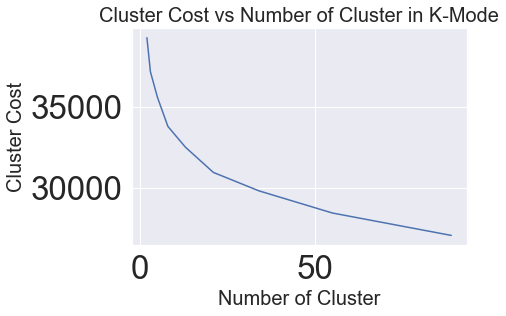

In [303]:
plt.plot([2, 3, 5, 8, 13, 21, 34, 55, 89], km_cost2[range(0,9,1)])
plt.ylabel("Cluster Cost", fontsize=20)
plt.xlabel("Number of Cluster", fontsize=20)
plt.title("Cluster Cost vs Number of Cluster in K-Mode", fontsize=20)
plt.show()

# Modeling and Evaluation 2 (Evaluate and Compare)<a id="ME_2"></a>

# Modeling and Evaluation 3 (Visualization Results)<a id="ME_3"></a>

Visualization of Important features

# Modeling and Evaluation 4 (Summary of The Ramification)<a id="ME_4"></a>

Everyone, keep adding bullet points here...

# Deployment<a id="Deployment"></a>

# Exceptional Work <a id="Exceptional_Work"></a>

Gower Distance, PCA